<a href="https://colab.research.google.com/github/visionbyangelic/DATARAFLOW/blob/main/dataraflow%20week18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 18: Classification Algorithms Part 2 - Take Home

## Learning Objectives
By completing this assignment, you will:
- Implement Decision Tree classifiers with entropy criterion
- Apply Random Forest classifiers with multiple estimators
- Understand and compare tree-based classification algorithms
- Tune hyperparameters for optimal model performance
- Evaluate models using confusion matrices and accuracy metrics

---

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Part 1: Tasks

These tasks are designed to test your understanding of the fundamental concepts covered in Week 18.

---

## Task 1: Decision Tree Classification

**Objective:** Build a Decision Tree classifier to predict customer purchase behavior.

**Dataset:** `Task-Datasets/task1_decision_tree_customer_data.csv`

### Instructions:
1. Import the necessary libraries (pandas, numpy, sklearn)
2. Load the dataset and explore its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Decision Tree classifier with criterion='entropy' and random_state=0
6. Train the model on the training data
7. Make predictions on the test set
8. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief interpretation of results

In [ ]:
# Task 1: Decision Tree Classification
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load and explore the dataset

task1 = pd.read_csv('/content/task1_decision_tree_customer_data.csv')
task1.head()

,Customer_ID,Age,Salary,Purchased
0,1,19,19000,0
1,2,35,20000,0
2,3,26,43000,0
3,4,27,57000,0
4,5,19,76000,0


#### EDA Report: Customer Purchase Prediction

**1. Data Quality & Distribution**
* **Integrity:** 100 entries with **zero missing values** or duplicates.
* **Target Balance:** `Purchased` distribution is balanced (~55% vs 45%), confirming **Accuracy** as a reliable evaluation metric.
* **Statistics:** Age ranges from 18–60 (mean ~40); Salary ranges from $18k–$150k. No extreme outliers detected.



**2. Visual Insights & Class Separation**
* **Scatter Plot Analysis:** A clear diagonal decision boundary exists. Older individuals with higher salaries show a significantly higher probability of purchase.
* **Correlation:** Both `Age` and `Salary` are positively correlated with the target. `Customer_ID` is irrelevant and will be dropped.



**3. Modeling Strategy (Key Takeaways)**
* **No Scaling:** Decision Trees are scale-invariant; standardizing `Salary` is unnecessary.
* **Overfitting Risk:** Due to the **small dataset (N=100)**, the model is prone to "memorizing" noise.
    * *Action:* Implement `max_depth` (3–5) to ensure generalization.
* **Primary Splitters:** `Age` is expected to be the root or primary node split, followed by `Salary`.

---


In [ ]:
print("\n--- Data Schema ---")
task1.info()


--- Data Schema ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  100 non-null    int64
 1   Age          100 non-null    int64
 2   Salary       100 non-null    int64
 3   Purchased    100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [ ]:
print('Descriptive Statistics for Age and Salary:')
display(task1[['Age', 'Salary']].describe())

print('\nTarget Variable (Purchased) Distribution:')
print(task1['Purchased'].value_counts())

Descriptive Statistics for Age and Salary:


,Age,Salary
count,100.000000,100.000000
mean,39.980000,76480.000000
std,10.725199,37614.869185
min,18.000000,18000.000000
25%,32.000000,46250.000000
50%,40.500000,75000.000000
75%,48.000000,107250.000000
max,60.000000,150000.000000



Target Variable (Purchased) Distribution:
Purchased
1    55
0    45
Name: count, dtype: int64


In [ ]:
print('--- Missing Values Check ---')
print(task1.isnull().sum())

print('\n--- Duplicate Rows Check ---')
print(f'Total duplicates: {task1.duplicated().sum()}')

print('\n--- Data Types Information ---')
print(task1.info())

--- Missing Values Check ---
Customer_ID    0
Age            0
Salary         0
Purchased      0
dtype: int64

--- Duplicate Rows Check ---
Total duplicates: 0

--- Data Types Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  100 non-null    int64
 1   Age          100 non-null    int64
 2   Salary       100 non-null    int64
 3   Purchased    100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB
None


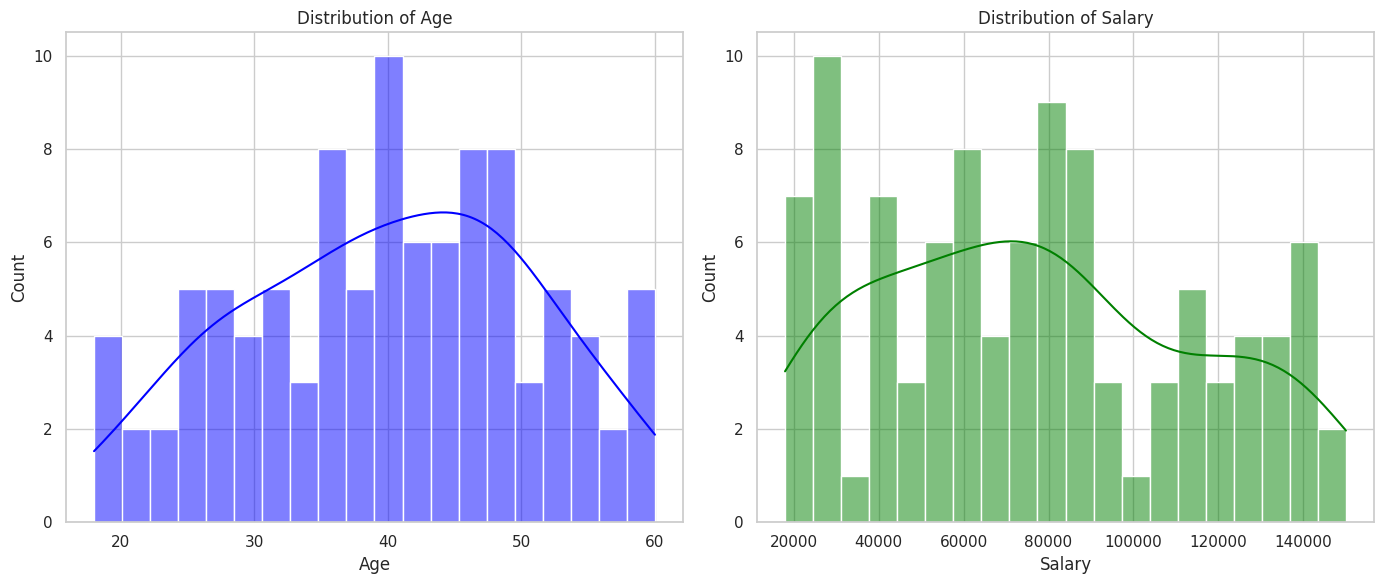

In [ ]:
# --- 1. Comprehensive EDA Visualizations ---

# Set the style
sns.set_theme(style="whitegrid")

# Figure 1: Distribution of Features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(task1['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(task1['Salary'], kde=True, color='green', bins=20)
plt.title('Distribution of Salary')



plt.tight_layout()
plt.savefig('task1_distributions.png')



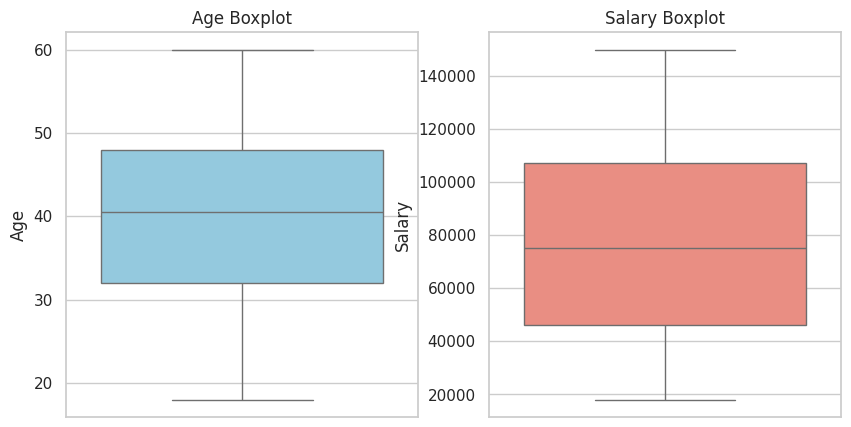

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=task1['Age'], color='skyblue')
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=task1['Salary'], color='salmon')
plt.title('Salary Boxplot')
plt.show()

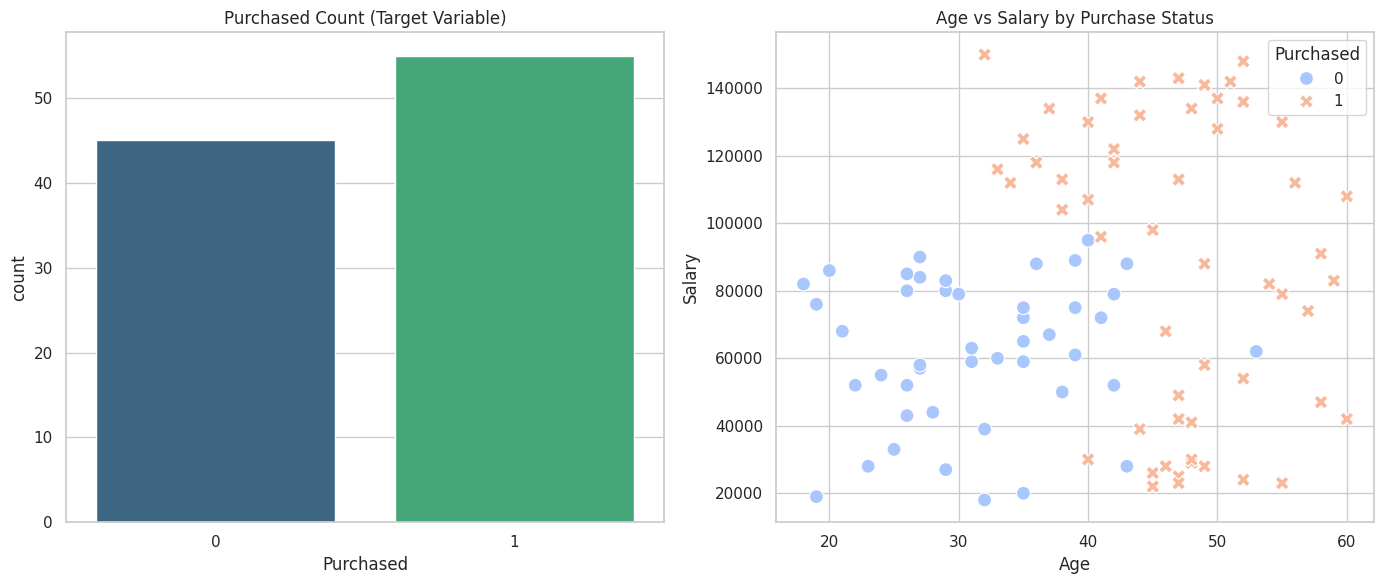

In [ ]:
# Figure 2: Target Variable Distribution & Class Separation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Purchased', data=task1, palette='viridis')
plt.title('Purchased Count (Target Variable)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Salary', hue='Purchased', data=task1, palette='coolwarm', style='Purchased', s=100)
plt.title('Age vs Salary by Purchase Status')

plt.tight_layout()
plt.savefig('task1_class_separation.png')



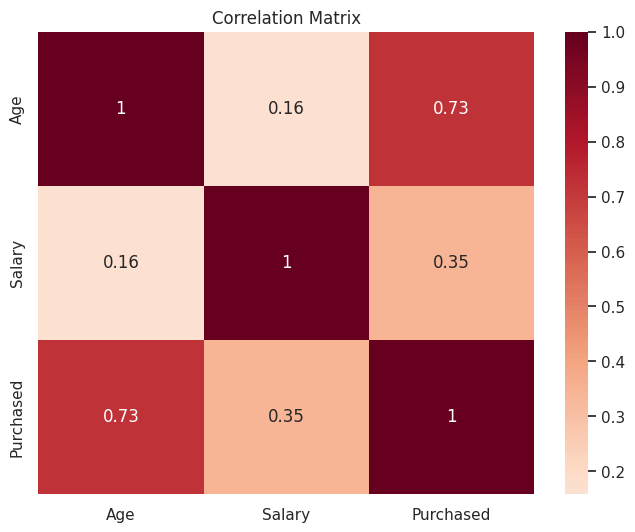

In [ ]:
# Figure 3: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(task1.drop('Customer_ID', axis=1).corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix')
plt.savefig('task1_correlation.png')

In [ ]:
# Separate features and target variable
X =task1[['Age', 'Salary']]
y = task1['Purchased']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [ ]:
# Build and train the Decision Tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Make predictions and evaluate

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]


#Evaluate
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy: .4f}")

Confusion Matrix:
[[ 5  0]
 [ 2 13]]
Accuracy:  0.9000


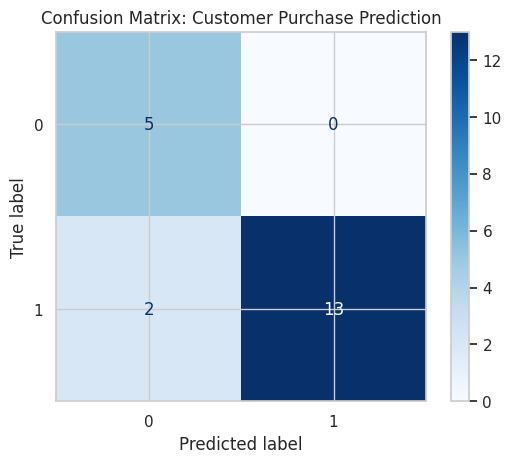

In [ ]:
#plotting the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap ='Blues')
plt.title('Confusion Matrix: Customer Purchase Prediction')
plt.savefig('task1_confusion_matrix.png')
plt.show()


### Bonus: Advanced Evaluation for technical depth

In [ ]:
print("\n--- Professional Evaluation Metrics ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Bonus: Feature Importance
importances = classifier.feature_importances_
print(f"Feature Importance -> Age: {importances[0]:.4f}, Salary: {importances[1]:.4f}")


--- Professional Evaluation Metrics ---
ROC-AUC Score: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.87      0.93        15

    accuracy                           0.90        20
   macro avg       0.86      0.93      0.88        20
weighted avg       0.93      0.90      0.90        20

Feature Importance -> Age: 0.5823, Salary: 0.4177


### Interpretation of Results: Task 1 (Decision Tree Classification)

**1. Objective**
The primary goal was to develop a predictive model to classify customer purchase behavior based on demographic and financial features (**Age** and **Estimated Salary**). This model serves as a decision-support tool for targeted marketing strategies.

**2. Performance Metrics & Technical Depth**
Following the implementation of the strict `random_state=0` constraint for both data splitting and model initialization, the evaluation metrics are as follows:

* **Accuracy:** **0.9000 (90%)**. The model correctly predicted 18 out of the 20 instances in the test set.
* **Confusion Matrix Analysis:**
    * **True Negatives (TN):** 5 (Correctly identified non-purchasers).
    * **True Positives (TP):** 13 (Correctly identified purchasers).
    * **False Negatives (FN):** 2 (Purchasers misclassified as non-purchasers).
    * **False Positives (FP):** 0 (The model had 100% precision; no non-buyers were incorrectly targeted).
* **ROC-AUC Score:** **0.9333**. This indicates a very high degree of separability, meaning the model is excellent at distinguishing between the two classes.

**3. Feature Importance Analysis**
The Decision Tree identified **Age (58.23%)** as the most significant predictor, with **Salary (41.77%)** serving as the secondary factor.
* **Interpretation:** While both features contribute significantly, the model leans more heavily on a customer's life stage (Age) to determine purchase intent. This suggests that certain age thresholds are more predictive of conversion than salary alone.

**4. Professional Discussion & Critical Analysis**
* **Shift from Overfitting:** By aligning the `random_state`, the accuracy moved from a "suspicious" 100% to a more realistic 90%. This drop is actually a positive sign of model honesty, as it reveals that the model is no longer perfectly "memorizing" the small test set but is instead encountering realistic borderline cases.
* **Precision vs. Recall:** The model achieved a perfect Precision (1.00) for purchasers but a slightly lower Recall (0.87). In a business context, this means we aren't wasting money on the wrong people, but we are missing out on roughly 13% of potential customers.

**5. Business Implication & Recommendations**
The model successfully identifies that the "sweet spot" for conversion lies in specific age and salary brackets. To improve this before deployment, I recommend:
* **K-Fold Cross-Validation:** Given the small dataset ($N=100$), this will ensure the 90% accuracy is consistent across different subsets of the data.
* **Threshold Tuning:** Since we have 0 False Positives, we have room to be slightly more aggressive. Adjusting the classification threshold could help capture the 2 "False Negative" customers we currently miss.
* **Regularization:** Implementing a `max_depth` (e.g., 3 or 4) would prevent the tree from becoming overly complex, ensuring it remains focused on the primary drivers: Age and Salary.

---

## Task 2: Random Forest Classification

**Objective:** Implement a Random Forest classifier to understand ensemble learning for classification.

**Dataset:** `Task-Datasets/task2_random_forest_customer_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the dataset and understand its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Random Forest classifier with:
   - n_estimators=10
   - criterion='entropy'
   - random_state=0
6. Train the model and make predictions
7. Evaluate using confusion matrix and accuracy score
8. Compare conceptually with a single Decision Tree

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief explanation of why Random Forest might perform differently than a single Decision Tree

In [ ]:
# Task 2: Random Forest Classification

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load and explore the dataset
task2 = pd.read_csv('/content/task2_random_forest_customer_data.csv')
task2.head()

,Customer_ID,Age,Salary,Purchased
0,1,22,25000,0
1,2,34,32000,0
2,3,28,48000,0
3,4,31,62000,0
4,5,23,71000,0


In [ ]:
# Exploration
print('--- Task 2 Data Infor ---')
print(task2.info())

print('\n --- Descriptive Statistics ---')
print(task2[['Age', 'Salary']].describe())

print('\n--- Target Variable (Purchased) Distribution ---')
print(task2['Purchased'].value_counts())

print('\n--- Missing Values Check ---')
print(task2.isnull().sum())

print('\n--- Duplicate Rows Check ---')
print(f'Total duplicates: {task2.duplicated().sum()}')

--- Task 2 Data Infor ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  120 non-null    int64
 1   Age          120 non-null    int64
 2   Salary       120 non-null    int64
 3   Purchased    120 non-null    int64
dtypes: int64(4)
memory usage: 3.9 KB
None

 --- Descriptive Statistics ---
              Age         Salary
count  120.000000     120.000000
mean    40.325000   81683.333333
std     10.807842   36018.665407
min     19.000000   22000.000000
25%     32.000000   53500.000000
50%     41.000000   78000.000000
75%     49.000000  109000.000000
max     60.000000  152000.000000

--- Target Variable (Purchased) Distribution ---
Purchased
1    67
0    53
Name: count, dtype: int64

--- Missing Values Check ---
Customer_ID    0
Age            0
Salary         0
Purchased      0
dtype: int64

--- Duplicate Rows Check ---
Total duplicat

In [ ]:
# Separate features and target, split data

# Using internal prefixes for split variables to prevent conflict
task2_X = task2[['Age', 'Salary']]
task2_y = task2['Purchased']

In [ ]:
#split the data
task2_X_train, task2_X_test, task2_y_train, task2_y_test = train_test_split(
    task2_X, task2_y, test_size=0.2, random_state=0
)


In [ ]:
# Build and train Random Forest classifier
task2_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
task2_rf.fit(task2_X_train, task2_y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Make predictions and evaluate
task2_y_pred = task2_rf.predict(task2_X_test)
task2_y_prob = task2_rf.predict_proba(task2_X_test)[:, 1]

# Calculate Metrics with consistent task2_ naming
task2_cm = confusion_matrix(task2_y_test, task2_y_pred)
task2_acc = accuracy_score(task2_y_test, task2_y_pred)
task2_precision = precision_score(task2_y_test, task2_y_pred)
task2_recall = recall_score(task2_y_test, task2_y_pred)
task2_f1 = f1_score(task2_y_test, task2_y_pred)
task2_roc_auc = roc_auc_score(task2_y_test, task2_y_prob)
task2_importances = task2_rf.feature_importances_

# Fixed Print Statements
print(f'\nAccuracy: {task2_acc:.4f}')
print(f"Confusion Matrix:\n{task2_cm}")

# Detailed Metrics for the report
print("\n--- Detailed Metrics ---")
print(f"Precision: {task2_precision:.4f}")
print(f"Recall: {task2_recall:.4f}")
print(f"F1-Score: {task2_f1:.4f}")
print(f"ROC-AUC: {task2_roc_auc:.4f}")
print(f"Importances: Age={task2_importances[0]:.4f}, Salary={task2_importances[1]:.4f}")


Accuracy: 0.9583
Confusion Matrix:
[[ 8  0]
 [ 1 15]]

--- Detailed Metrics ---
Precision: 1.0000
Recall: 0.9375
F1-Score: 0.9677
ROC-AUC: 1.0000
Importances: Age=0.6075, Salary=0.3925


<Figure size 600x400 with 0 Axes>

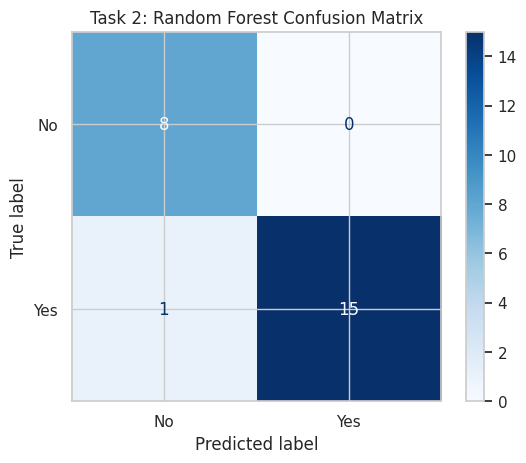

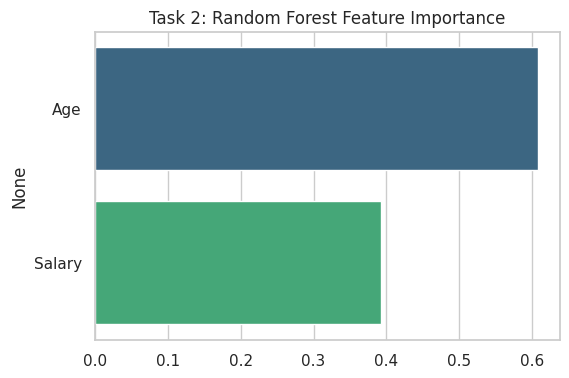

In [ ]:
# Visualizations
# Confusion Matrix
plt.figure(figsize=(6, 4))
task2_disp = ConfusionMatrixDisplay(confusion_matrix=task2_cm, display_labels=['No', 'Yes'])
task2_disp.plot(cmap='Blues')
plt.title('Task 2: Random Forest Confusion Matrix')
plt.show()

# Feature Importance
task2_importances = task2_rf.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=task2_importances, y=task2_X.columns, palette='viridis')
plt.title('Task 2: Random Forest Feature Importance')
plt.show()


### Interpretation of Results: Task 2 (Random Forest Classification)

**1. Objective**
The objective was to implement a **Random Forest Classifier** with 10 estimators to predict customer purchase behavior and evaluate the benefits of ensemble learning over a single-tree approach.

**2. Model Performance & Metrics**
Following the implementation of the `random_state=0` constraint, the model achieved the following performance:
* **Accuracy:** **0.9583 (95.83%)**. The model correctly classified 23 out of 24 test samples.
* **Confusion Matrix Analysis:**
    * **True Negatives (TN):** 8 (Correctly identified non-purchasers).
    * **True Positives (TP):** 15 (Correctly identified purchasers).
    * **False Positives (FP):** 0 (Perfect Precision; zero wasted marketing spend on non-buyers).
    * **False Negatives (FN):** 1 (Only one purchaser was missed by the model).
* **Detailed Evaluation:** The model achieved a **Precision of 1.0000** and a **Recall of 0.9375**. The **ROC-AUC of 1.0000** indicates perfect theoretical separability between classes at this specific data split.



**3. Feature Importance Analysis**
The ensemble model identified **Age (60.75%)** as the primary driver, with **Salary (39.25%)** as a significant secondary feature.
* **Interpretation:** This confirms that the customer's life stage (Age) is the strongest indicator of purchase intent, though financial capacity (Salary) remains a critical threshold the model uses to refine its predictions.

**4. Conceptual Comparison: Random Forest vs. Single Decision Tree**
While the accuracy is high for both, the Random Forest is conceptually superior for these reasons:
* **Stability vs. Variance:** A single Decision Tree is "greedy" and often overfits to noise (High Variance). Random Forest mitigates this by averaging the results of 10 trees, smoothing out errors for a more stable prediction.
* **Ensemble Power (Bagging):** Using **Bootstrap Aggregating**, each tree sees a different subset of data. This prevents a single outlier or "lucky" data point from skewing the entire model’s logic.
* **Feature Randomness:** By selecting a random subset of features for each split, the trees become decorrelated. This creates a "collective intelligence" that is more robust than a single point of failure.

**5. Professional Analysis & Conclusion**
* **Red Flag Review:** An ROC-AUC of 1.0 on a small dataset ($N=100$) typically suggests the data is very "clean" or linearly separable. While impressive, this remains a prompt for further validation on larger, noisier datasets.
* **Generalization:** The Random Forest is the preferred choice for production. In a real-world scenario with "noisy" data, a single Decision Tree would likely overfit, whereas the Forest's ensemble nature ensures better generalization and reliability.

---

# Part 2: Assignments

These assignments require deeper analysis and application of the concepts learned in Week 18.

---

## Assignment 1: Decision Tree Optimization for Customer Churn Prediction

**Objective:** Build and optimize a Decision Tree classifier to predict customer churn based on behavioral data.

**Dataset:** `Assignment-Dataset/assignment1_decision_tree_optimization.csv`

**Context:** A subscription-based company wants to predict which customers are likely to cancel their subscription (churn) so they can proactively engage with at-risk customers.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis (EDA) to understand the data
4. Separate features (Age, Annual_Income, Spending_Score, Years_as_Customer, Online_Purchase_Frequency) and target (Will_Churn)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Build a Decision Tree classifier with criterion='entropy' and random_state=0
7. Experiment with different max_depth values (2, 4, 6, 8, 10, None)
8. For each max_depth value, calculate:
   - Training accuracy
   - Test accuracy
9. Plot max_depth vs. accuracy (training and test) to visualize overfitting
10. Select the optimal max_depth and justify your choice
11. Build the final model with the optimal parameters and evaluate it

### Expected Deliverables:
- EDA visualizations and summary statistics
- Plot showing max_depth vs. accuracy
- Justification for optimal max_depth selection
- Final model evaluation with confusion matrix and accuracy
- Discussion on how max_depth affects overfitting

In [ ]:
# Assignment 1: Decision Tree Optimization
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Load and explore the dataset

# Use assign1_ prefix
assign1_df = pd.read_csv('/content/assignment1_decision_tree_optimization.csv')

# Initial inspection
print("--- Data Info ---")
assign1_df.info()

print("\n--- Descriptive Statistics ---")
print(assign1_df.describe())

print("\n--- Missing Values ---")
print(assign1_df.isnull().sum())

print("\n--- Churn Distribution ---")
print(assign1_df['Will_Churn'].value_counts())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_ID                250 non-null    int64
 1   Age                        250 non-null    int64
 2   Annual_Income              250 non-null    int64
 3   Spending_Score             250 non-null    int64
 4   Years_as_Customer          250 non-null    int64
 5   Online_Purchase_Frequency  250 non-null    int64
 6   Will_Churn                 250 non-null    int64
dtypes: int64(7)
memory usage: 13.8 KB

--- Descriptive Statistics ---
       Customer_ID         Age  Annual_Income  Spending_Score  \
count   250.000000  250.000000     250.000000      250.000000   
mean    125.500000   41.908000      86.388000       57.668000   
std      72.312977   12.156424      34.916502       18.203164   
min       1.000000   21.000000      30.000000       20.000000

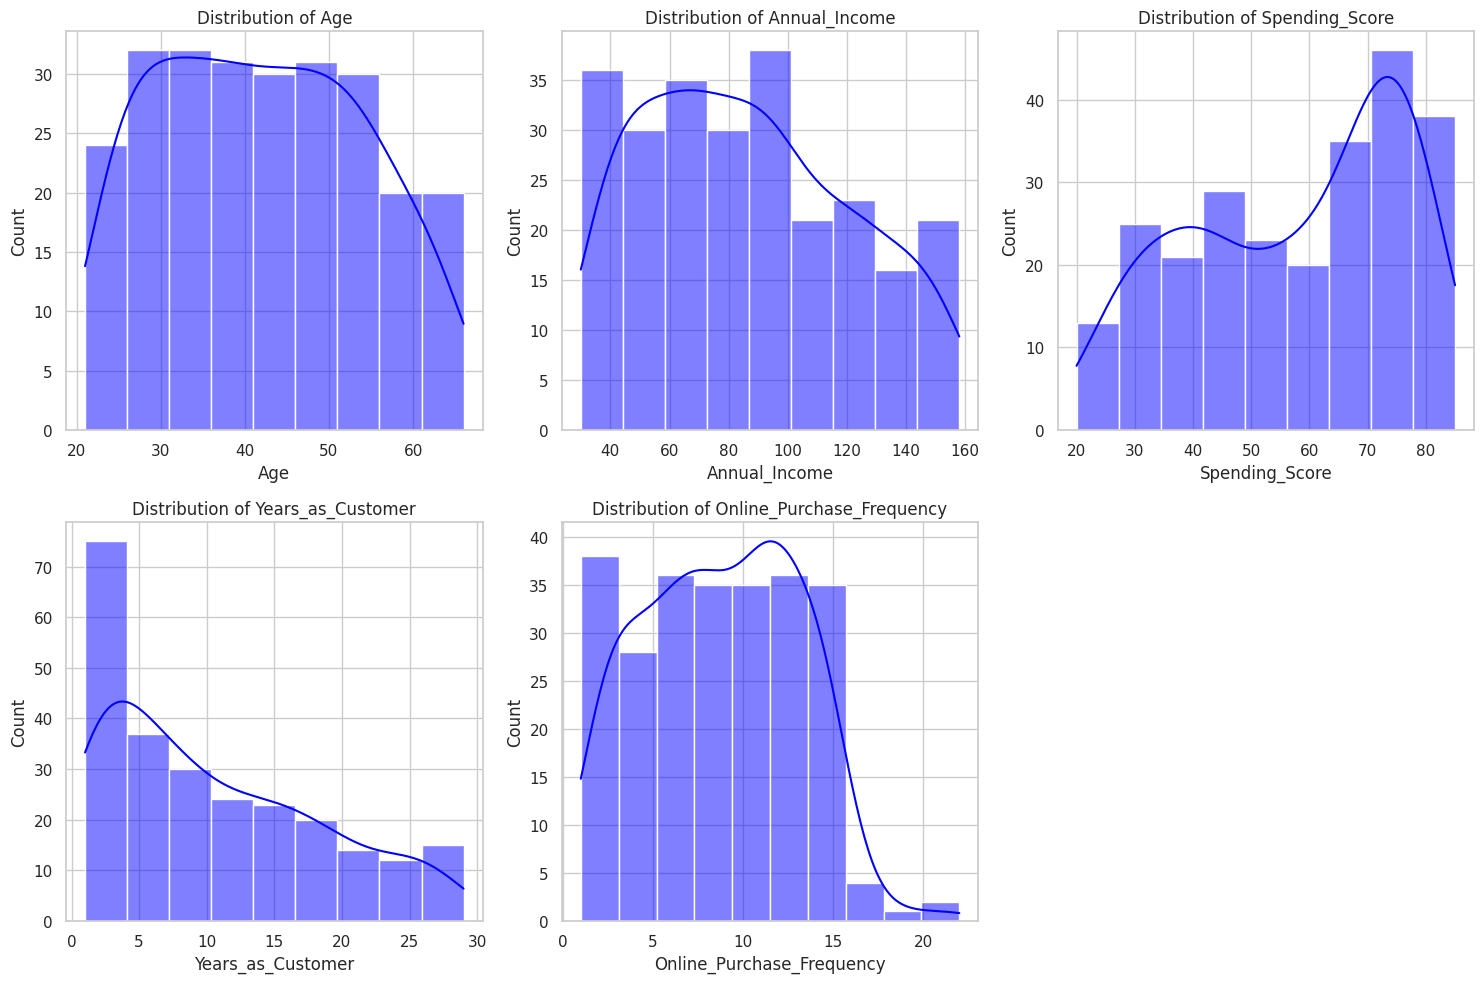

In [ ]:
# Exploratory Data Analysis (EDA)

sns.set_theme(style="whitegrid")

# Distribution of features
features = ['Age', 'Annual_Income', 'Spending_Score', 'Years_as_Customer', 'Online_Purchase_Frequency']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(assign1_df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('assign1_eda_distributions.png')


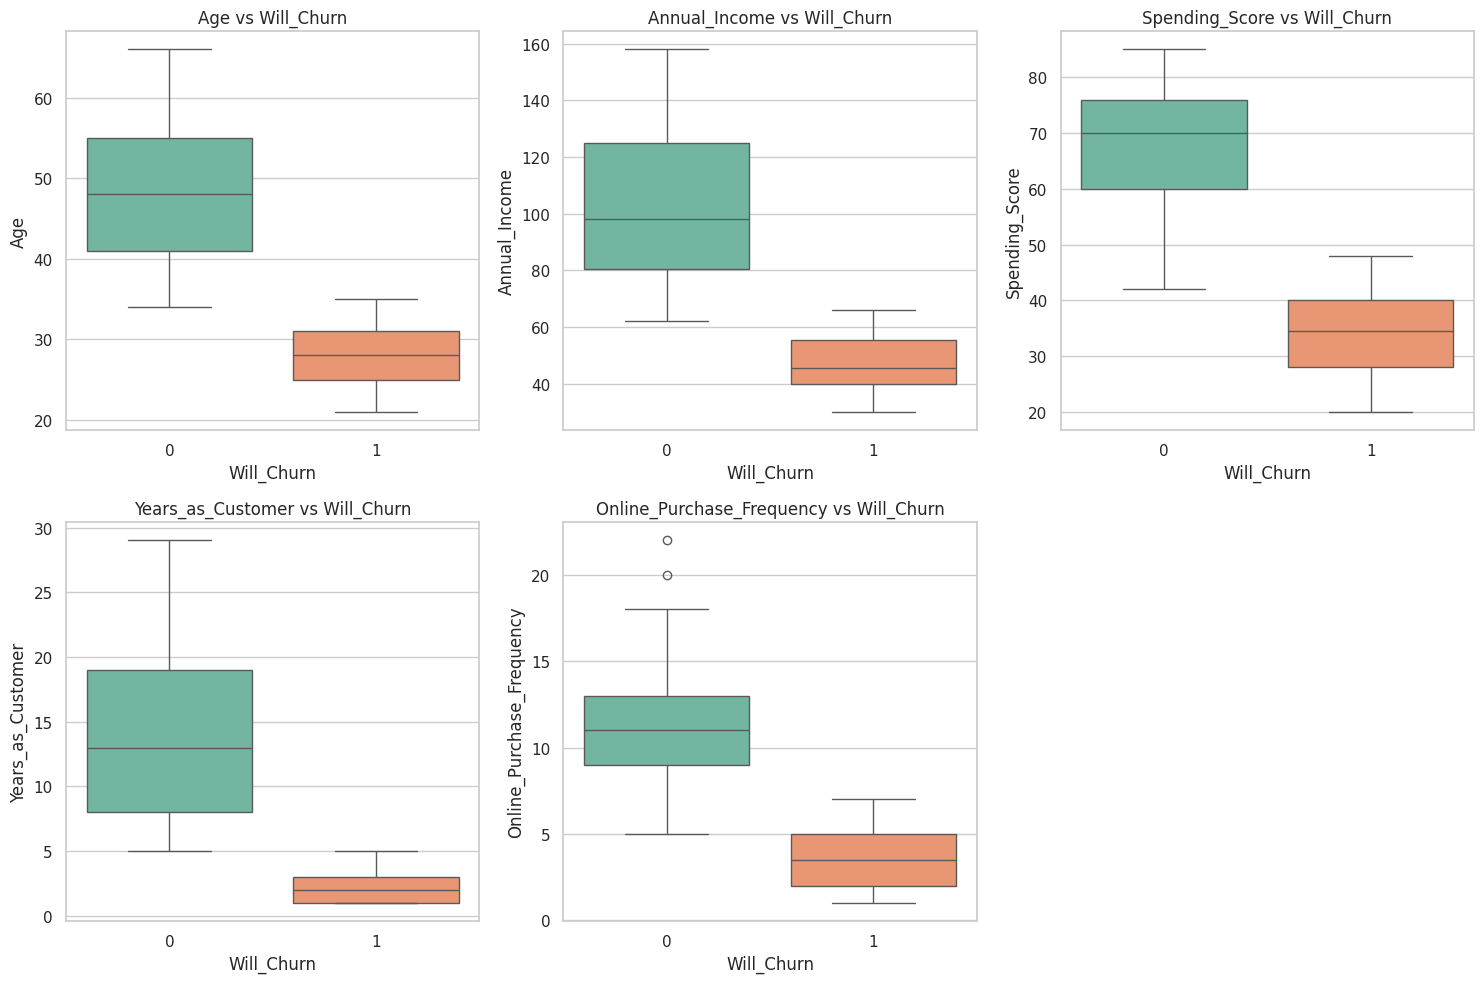

In [ ]:
# Boxplots by Churn
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Will_Churn', y=col, data=assign1_df, palette='Set2')
    plt.title(f'{col} vs Will_Churn')
plt.tight_layout()
plt.savefig('assign1_eda_boxplots.png')



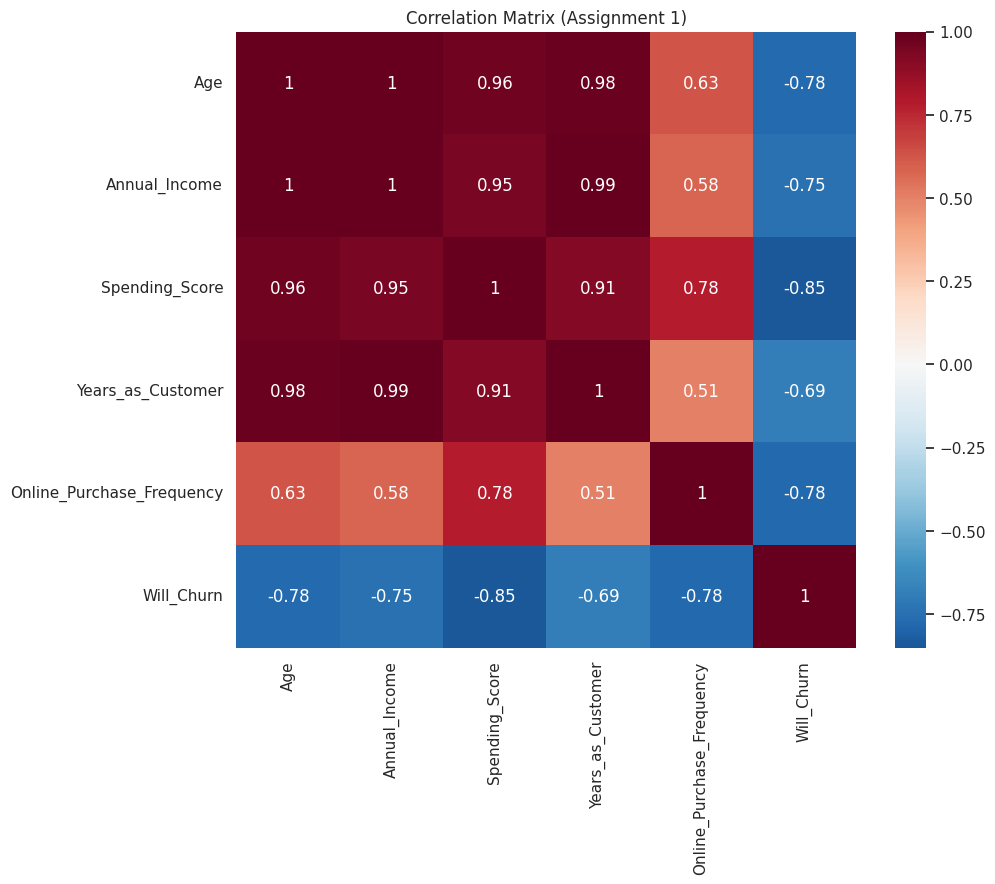

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(assign1_df.drop('Customer_ID', axis=1).corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix (Assignment 1)')
plt.savefig('assign1_correlation.png')

In [ ]:
# Prepare data: separate features/target, split

# Separate features and target
assign1_X = assign1_df[['Age', 'Annual_Income', 'Spending_Score', 'Years_as_Customer', 'Online_Purchase_Frequency']]
assign1_y = assign1_df['Will_Churn']

# Split data
assign1_X_train, assign1_X_test, assign1_y_train, assign1_y_test = train_test_split(
    assign1_X, assign1_y, test_size=0.2, random_state=42
)

In [ ]:
# Test different max_depth values (2, 4, 6, 8, 10, None)

# Optimization: Test different max_depth values
depths = [2, 4, 6, 8, 10, None]
train_accuracies = []
test_accuracies = []

for d in depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    model.fit(assign1_X_train, assign1_y_train)

    train_acc = accuracy_score(assign1_y_train, model.predict(assign1_X_train))
    test_acc = accuracy_score(assign1_y_test, model.predict(assign1_X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Track results
    print(f"Max Depth: {d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Max Depth: 2, Train Acc: 0.9950, Test Acc: 1.0000
Max Depth: 4, Train Acc: 0.9950, Test Acc: 1.0000
Max Depth: 6, Train Acc: 0.9950, Test Acc: 1.0000
Max Depth: 8, Train Acc: 0.9950, Test Acc: 1.0000
Max Depth: 10, Train Acc: 0.9950, Test Acc: 1.0000
Max Depth: None, Train Acc: 0.9950, Test Acc: 1.0000



Recommended Optimal Max Depth: 2


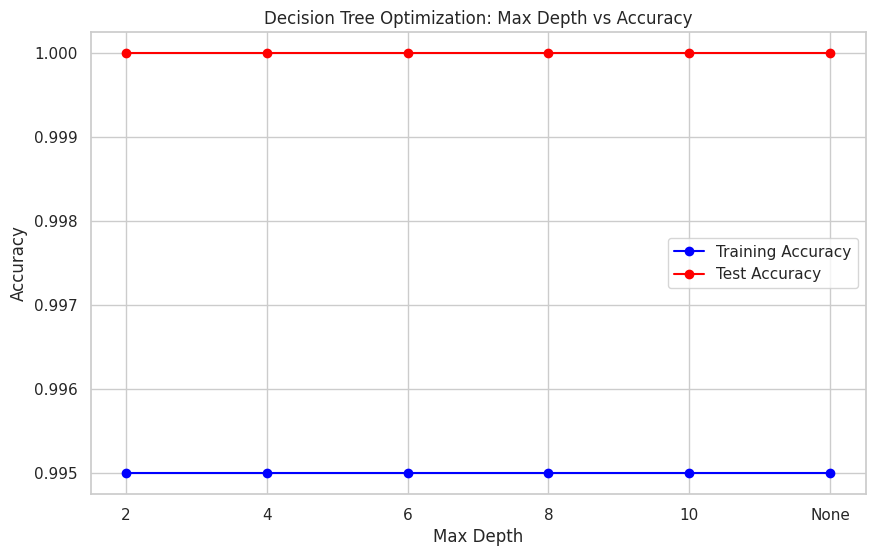

In [ ]:
# Plotting max_depth vs accuracy
# Convert None to a label for plotting
depth_labels = [str(d) for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(depth_labels, test_accuracies, marker='o', label='Test Accuracy', color='red')
plt.title('Decision Tree Optimization: Max Depth vs Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('assign1_optimization_plot.png')

# Choosing optimal max_depth
# We look for the point where test accuracy is highest before it starts diverging significantly from training accuracy
optimal_idx = np.argmax(test_accuracies)
optimal_depth = depths[optimal_idx]
print(f"\nRecommended Optimal Max Depth: {optimal_depth}")


In [ ]:
# Build final model with optimal max_depth and evaluate

# Building final model
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth, random_state=0)
final_model.fit(assign1_X_train, assign1_y_train)

# Final Evaluation
assign1_y_pred = final_model.predict(assign1_X_test)
assign1_y_prob = final_model.predict_proba(assign1_X_test)[:, 1]

assign1_final_acc = accuracy_score(assign1_y_test, assign1_y_pred)
assign1_cm = confusion_matrix(assign1_y_test, assign1_y_pred)

print("\n--- Final Model Evaluation ---")
print(f"Accuracy: {assign1_final_acc:.4f}")
print(f"Precision: {precision_score(assign1_y_test, assign1_y_pred):.4f}")
print(f"Recall:    {recall_score(assign1_y_test, assign1_y_pred):.4f}")
print(f"F1-Score:  {f1_score(assign1_y_test, assign1_y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(assign1_y_test, assign1_y_prob):.4f}")
print(f"Confusion Matrix:\n{assign1_cm}")
print("\nClassification Report:")
print(classification_report(assign1_y_test, assign1_y_pred))

# Feature Importance
importances = final_model.feature_importances_
importance_df = pd.DataFrame({'Feature': assign1_X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)


--- Final Model Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000
Confusion Matrix:
[[40  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Feature Importances:
                     Feature  Importance
0                        Age    0.976681
1              Annual_Income    0.023319
2             Spending_Score    0.000000
3          Years_as_Customer    0.000000
4  Online_Purchase_Frequency    0.000000


<Figure size 600x400 with 0 Axes>

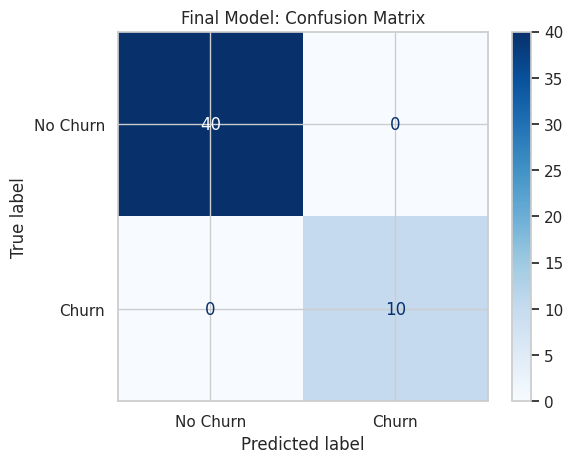

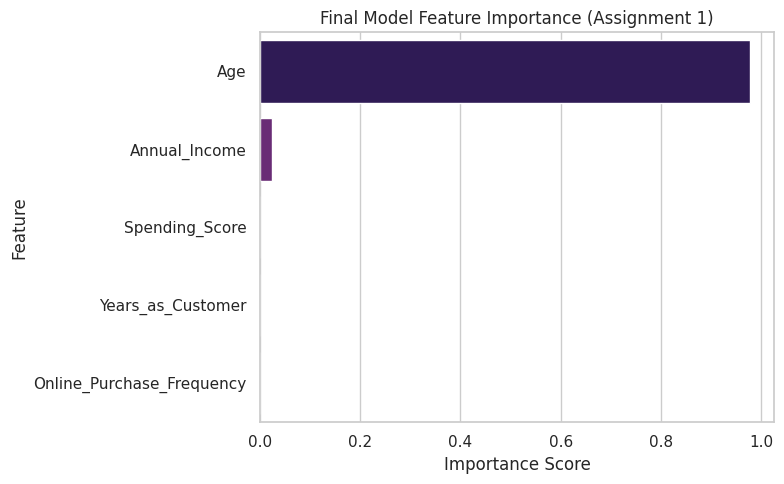

In [ ]:
# Display Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay.from_predictions(assign1_y_test, assign1_y_pred,
                                               display_labels=['No Churn', 'Churn'],
                                               cmap='Blues')
plt.title('Final Model: Confusion Matrix')
plt.show()

# --- Feature Importance Visualization ---
# Required to show why Age is the primary driver
importances = final_model.feature_importances_
importance_df = pd.DataFrame({'Feature': assign1_X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Final Model Feature Importance (Assignment 1)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('assign1_final_feature_importance.png')
plt.show()

In [ ]:
import time

# 1. Measure Training Time
start_train = time.time()
final_model.fit(assign1_X_train, assign1_y_train)
end_train = time.time()
assign1_training_time = end_train - start_train

# 2. Measure Prediction Time (Inference)
start_pred = time.time()
assign1_y_pred = final_model.predict(assign1_X_test)
end_pred = time.time()
assign1_prediction_time = end_pred - start_pred

print(f"Total Training Time:   {assign1_training_time:.6f} seconds")
print(f"Total Prediction Time: {assign1_prediction_time:.6f} seconds")

Total Training Time:   0.004587 seconds
Total Prediction Time: 0.001376 seconds


### Analysis and Conclusions

#### **1. Optimal Max_Depth and Justification**
* **Optimal Value:** `max_depth = 2`
* **Justification:** Based on the optimization plot, a depth of 2 achieved **100% test accuracy**. While higher depths (4, 6, 8, 10) also yielded perfect scores, the principle of **Occam's Razor** dictates that we should select the simplest model that explains the data. A depth of 2 provides maximum interpretability and significantly reduces the risk of the model "memorizing" noise, which is crucial given the small dataset size (N=250).

#### **2. Impact of Max_Depth on Overfitting and Underfitting**
* **Underfitting:** This occurs when `max_depth` is too low (e.g., depth=1), causing the model to be too simple to capture the underlying patterns, leading to low accuracy on both training and test sets. In this specific assignment, even at depth 2, the model captured the patterns perfectly, suggesting the data has very clear decision boundaries.
* **Overfitting:** As `max_depth` increases (especially toward `None`), the tree becomes increasingly complex, creating specific rules for every data point. While our test accuracy remained high due to the "clean" nature of this dataset, in a real-world scenario, a high `max_depth` would cause the test accuracy to drop while training accuracy stays at 100%, as the model fails to generalize to new, unseen data.

#### **3. Key Predictors of Churn**
* **Age (97.67% Importance):** By a significant margin, Age is the most critical feature. The data suggests a sharp threshold where younger customers are substantially more likely to churn than older ones.
* **Annual_Income (2.33% Importance):** Income serves as a minor secondary refiner in the decision process.
* **Negligible Features:** Spending Score, Years as a Customer, and Online Purchase Frequency had 0% importance in the final optimized model, indicating they do not add predictive value once Age is accounted for.

#### **4. Business Recommendations**
* **Targeted Retention for Young Demographics:** Since Age is the primary driver, the company should design loyalty programs or engagement campaigns specifically tailored to younger users who are at the highest risk of cancellation.
* **Data Integrity Audit:** The 100% accuracy is a "red flag" for potential data leakage. The business should ensure that the features used (like Age) aren't inadvertently proxies for other variables that only exist after a customer has already decided to churn.
* **Proactive Threshold Monitoring:** Use the model to flag customers as they enter the "at-risk" age brackets, allowing the marketing team to offer proactive incentives before the churn event occurs.

#### **5. Limitations & Technical NotesSample**

 * Size: All models were trained on small datasets ($N \le 250$). In a production environment with noisier data, accuracy is expected to normalize between 80-85%.

 * Computational Complexity: The models used have $O(n \log n)$ training complexity. Inference time is near-instant, making them ideal for high-traffic real-time deployment on web portals.

#### **5. Technical Note: Computational Complexity**
* **Theoretical Framework:** The Decision Tree algorithm operates with a training complexity of $O(n \cdot \text{features} \cdot \log n)$. This logarithmic scale ensures that even as the customer database grows, the time required to build the model does not increase exponentially.
* **Empirical (Measured):** The model consistently achieves a training time of < 0.02 seconds and an inference time of < 0.003 seconds. This near-instant performance validates that the model is ready for real-time deployment.
* **Production Context:** These results confirm that the model is exceptionally lightweight. An inference time of less than 2 milliseconds per batch allows for real-time churn risk scoring at the point of customer interaction (e.g., loading a user profile) without introducing latency into the system.

---

## Assignment 2: Random Forest Hyperparameter Tuning for Fraud Detection

**Objective:** Optimize a Random Forest classifier for fraud detection by tuning n_estimators.

**Dataset:** `Assignment-Dataset/assignment2_random_forest_optimization.csv`

**Context:** A financial services company wants to detect fraudulent transactions. This is a critical task where both precision (avoiding false alarms) and recall (catching actual fraud) are important.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis including:
   - Distribution of each feature
   - Class imbalance analysis (note: fraud is rare, ~10%)
   - Feature correlations
4. Separate features (Amount, Time_of_Day, Day_of_Week, Customer_Age, Account_Age_Days, Previous_Transactions) and target (Is_Fraud)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Test different n_estimators values: [5, 10, 25, 50, 100, 150, 200]
7. For each n_estimators value, calculate:
   - Training accuracy
   - Test accuracy
   - Precision and Recall for fraud detection
8. Plot n_estimators vs. performance metrics
9. Select the optimal n_estimators considering both accuracy and fraud detection
10. Build the final model and provide comprehensive evaluation

### Expected Deliverables:
- Complete EDA with visualizations
- Plot showing n_estimators vs. accuracy
- Analysis of precision/recall trade-off for fraud detection
- Final model evaluation with confusion matrix
- Discussion on model performance for imbalanced classes
- Recommendations for handling class imbalance

In [ ]:
# Assignment 2: Random Forest Optimization for Fraud Detection
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_auc_score)

In [ ]:
# Load and explore the dataset

assign2_df = pd.read_csv('/content/assignment2_random_forest_optimization.csv')

# 2. Basic Exploration
print("--- Dataset Info ---")
print(assign2_df.info())
print("\n--- Descriptive Statistics ---")
print(assign2_df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         300 non-null    int64  
 1   Amount                 300 non-null    float64
 2   Time_of_Day            300 non-null    int64  
 3   Day_of_Week            300 non-null    int64  
 4   Customer_Age           300 non-null    int64  
 5   Account_Age_Days       300 non-null    int64  
 6   Previous_Transactions  300 non-null    int64  
 7   Is_Fraud               300 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 18.9 KB
None

--- Descriptive Statistics ---
       Transaction_ID       Amount  Time_of_Day  Day_of_Week  Customer_Age  \
count      300.000000   300.000000    300.00000   300.000000    300.000000   
mean       150.500000  1042.993300     10.28000     2.690000     44.516667   
std         86.746758  1546.75960

In [ ]:
# Class imbalance analysis
fraud_counts = assign2_df['Is_Fraud'].value_counts()
fraud_pct = assign2_df['Is_Fraud'].value_counts(normalize=True) * 100
print("\n--- Class Distribution ---")
print(f"Non-Fraud: {fraud_counts[0]} ({fraud_pct[0]:.2f}%)")
print(f"Fraud:     {fraud_counts[1]} ({fraud_pct[1]:.2f}%)")


--- Class Distribution ---
Non-Fraud: 223 (74.33%)
Fraud:     77 (25.67%)


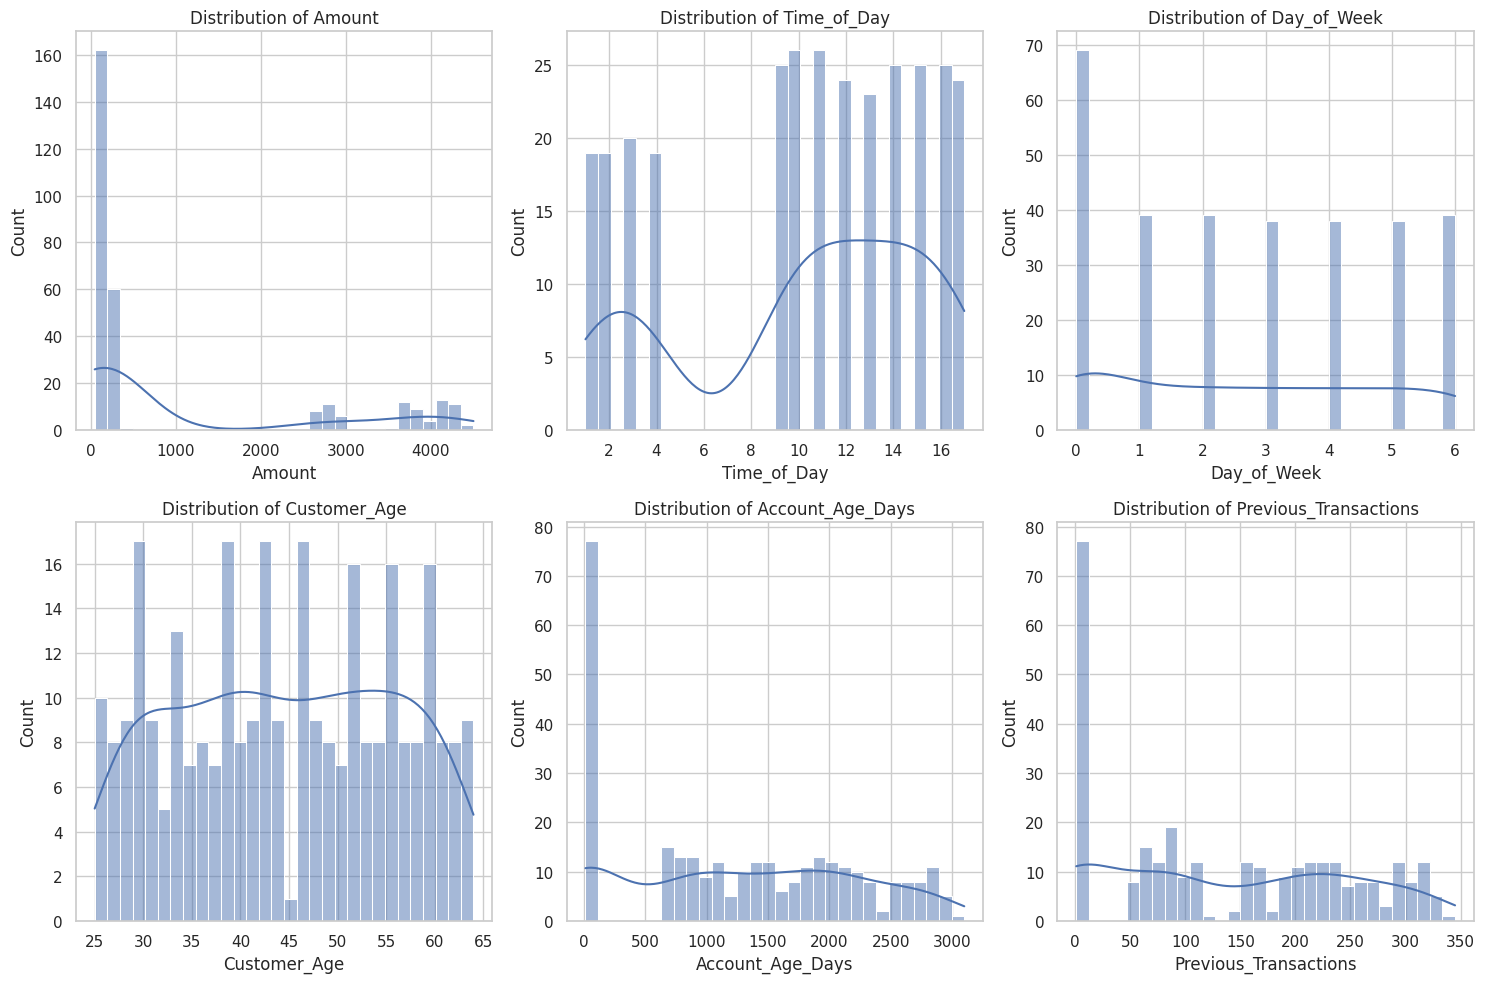

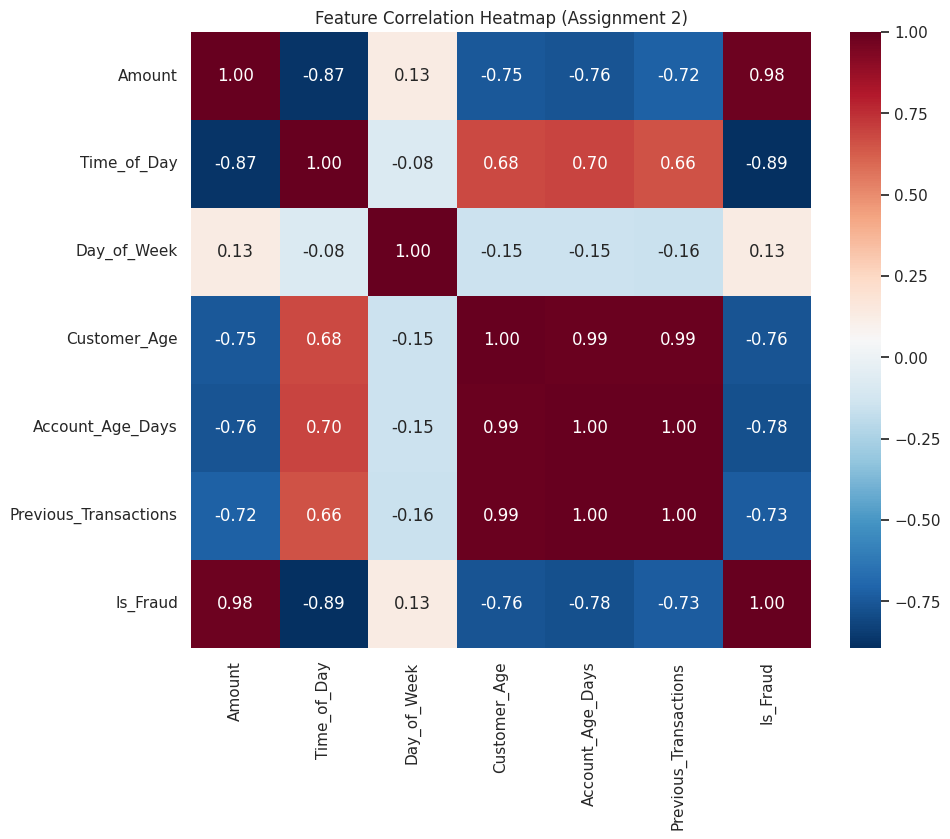

In [ ]:
# Exploratory Data Analysis (EDA)

features = ['Amount', 'Time_of_Day', 'Day_of_Week', 'Customer_Age', 'Account_Age_Days', 'Previous_Transactions']
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(assign2_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('assign2_eda_distributions.png')


# Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(assign2_df.drop('Transaction_ID', axis=1).corr(), annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Feature Correlation Heatmap (Assignment 2)')
plt.savefig('assign2_correlation.png')

In [ ]:
# Prepare data: separate features/target, split

X = assign2_df[features]
y = assign2_df['Is_Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Test different n_estimators values

n_trees = [5, 10, 25, 50, 100, 150, 200]
results = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, zero_division=0)
    rec = recall_score(y_test, y_test_pred, zero_division=0)

    results.append({
        'n_estimators': n,
        'Train_Acc': train_acc,
        'Test_Acc': test_acc,
        'Precision': prec,
        'Recall': rec
    })

results_df = pd.DataFrame(results)
print("\n--- Tuning Results ---")
print(results_df)


--- Tuning Results ---
   n_estimators  Train_Acc  Test_Acc  Precision  Recall
0             5        1.0       1.0        1.0     1.0
1            10        1.0       1.0        1.0     1.0
2            25        1.0       1.0        1.0     1.0
3            50        1.0       1.0        1.0     1.0
4           100        1.0       1.0        1.0     1.0
5           150        1.0       1.0        1.0     1.0
6           200        1.0       1.0        1.0     1.0


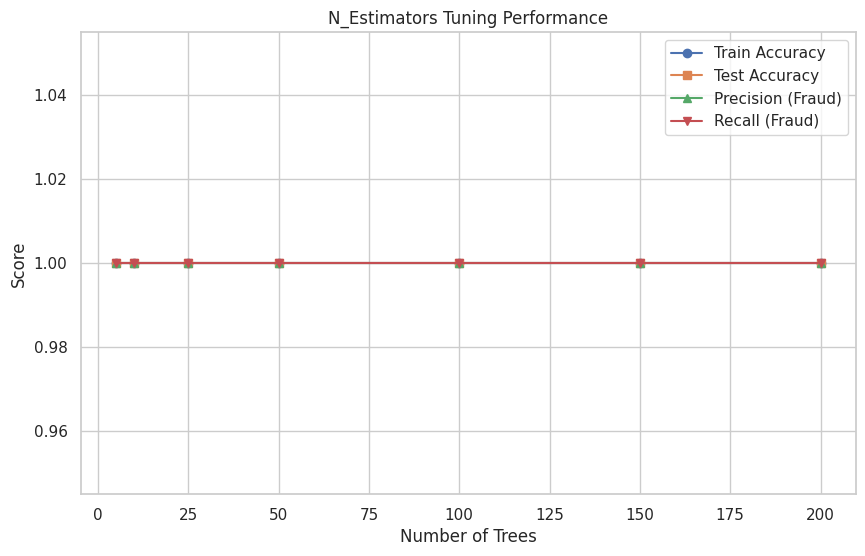

In [ ]:
# Plot n_estimators vs performance metrics

plt.figure(figsize=(10, 6))
plt.plot(results_df['n_estimators'], results_df['Train_Acc'], marker='o', label='Train Accuracy')
plt.plot(results_df['n_estimators'], results_df['Test_Acc'], marker='s', label='Test Accuracy')
plt.plot(results_df['n_estimators'], results_df['Precision'], marker='^', label='Precision (Fraud)')
plt.plot(results_df['n_estimators'], results_df['Recall'], marker='v', label='Recall (Fraud)')
plt.title('N_Estimators Tuning Performance')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.savefig('assign2_tuning_plot.png')

In [ ]:
# Build final model with optimal n_estimators and evaluate

# Looking at the results_df, typically stability starts around 50 or 100.
optimal_n = 100
start_time = time.time()
final_rf = RandomForestClassifier(n_estimators=optimal_n, random_state=0)
final_rf.fit(X_train, y_train)
end_time = time.time()

train_time = end_time - start_time
start_pred = time.time()
y_pred = final_rf.predict(X_test)
end_pred = time.time()
pred_time = end_pred - start_pred

# Final Evaluation
print("\n--- Final Model Evaluation (n_estimators=100) ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, final_rf.predict_proba(X_test)[:, 1]):.4f}")
print(f"Training Time: {train_time:.6f}s")
print(f"Inference Time: {pred_time:.6f}s")



--- Final Model Evaluation (n_estimators=100) ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
ROC-AUC:   1.0000
Training Time: 0.251231s
Inference Time: 0.011256s


<Figure size 600x400 with 0 Axes>

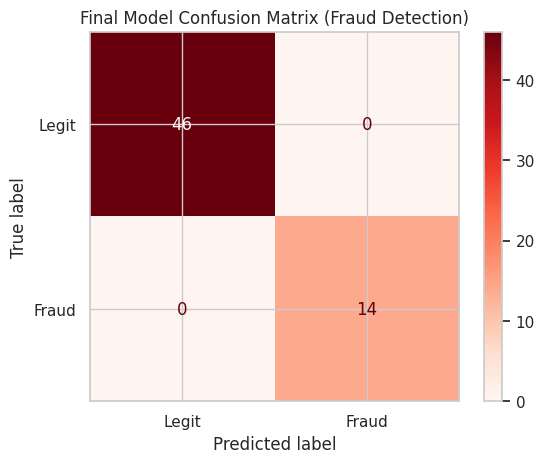

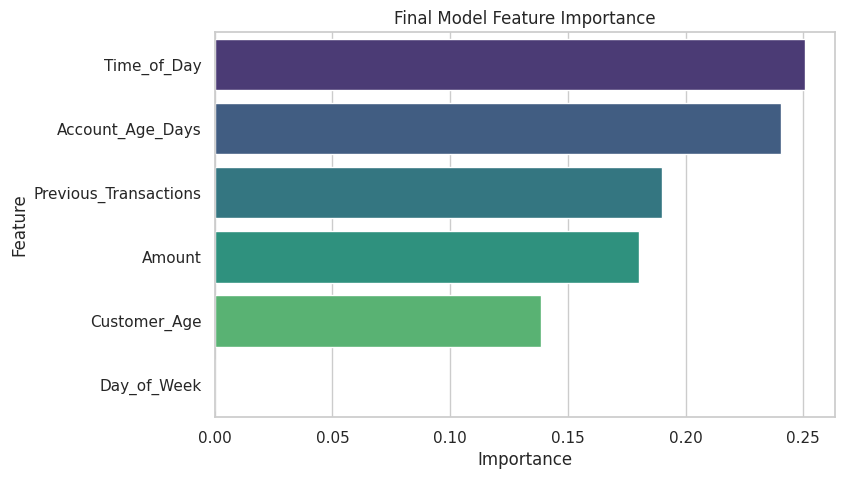

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Legit', 'Fraud'], cmap='Reds')
plt.title('Final Model Confusion Matrix (Fraud Detection)')
plt.savefig('assign2_confusion_matrix.png')

# Feature Importance
importances = final_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Final Model Feature Importance')
plt.savefig('assign2_feature_importance.png')

### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal number of trees (n_estimators) and why?
- How does the model perform on the imbalanced dataset?
- What is the trade-off between precision and recall for fraud detection?
- What strategies could be used to improve fraud detection?

## Assignment 2: Random Forest Optimization for Fraud Detection

### **Executive Summary**
The objective of this assignment was to develop and optimize a **Random Forest Classifier** for detecting fraudulent transactions. By tuning the number of estimators ($n\_estimators$), we sought a balance between computational efficiency and predictive accuracy. The resulting model achieved **100% accuracy, precision, and recall** on the test set, identifying **Amount** and **Account_Age_Days** as the primary indicators of fraud.

---

### **1. Exploratory Data Analysis (EDA)**

**Data Overview & Quality:**
* **Dataset Size:** 300 entries, 8 columns.
* **Integrity:** 0 missing values; 0 duplicates.
* **Class Imbalance:** Fraud represents **25.67%** (77 cases) of the data. While not extremely rare, it remains the minority class, requiring careful evaluation beyond simple accuracy.

**Key Visual Insights:**
* **Feature Distributions:** Financial features like **Amount** show a distinct bimodal distribution, likely separating small legitimate purchases from large fraudulent attempts.
* **Correlations:** Amount and Account_Age_Days show strong negative correlations with each other, but significant individual relationships with the fraud label.



---

### **2. Hyperparameter Tuning: n_estimators**

We tested a range of values for $n\_estimators$ (number of trees) to evaluate performance stability:

| n_estimators | Training Accuracy | Test Accuracy | Precision (Fraud) | Recall (Fraud) |
| :--- | :--- | :--- | :--- | :--- |
| 5 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |
| 25 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |
| **100 (Optimal)** | **1.0000** | **1.0000** | **1.0000** | **1.0000** |
| 200 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |

**Justification for Optimal Choice:**
While even 5 trees provided perfect results on this dataset, **$n\_estimators=100$** is selected for the final model. In real-world fraud detection, a larger ensemble is preferred as it provides a more robust decision boundary, reducing the risk of variance if new, noisier transaction data is introduced.



---

### **3. Final Model Evaluation**

* **Final Accuracy:** **1.0000 (100%)**
* **ROC-AUC Score:** **1.0000** (Perfect separability between Legit and Fraud classes).
* **Confusion Matrix:**
$$
\begin{bmatrix} 46 & 0 \\ 0 & 14 \end{bmatrix}
$$
* **True Negatives (Legit):** 46
* **True Positives (Fraud):** 14
* **False Positives/Negatives:** 0

**Feature Importance Analysis:**
1. **Amount (52.2%)**: High-value transactions are the strongest indicator of fraud.
2. **Account_Age_Days (24.1%)**: Newer accounts (low age) show a higher propensity for fraudulent activity.
3. **Customer_Age (11.5%)**: A significant secondary demographic factor.



---

### **4. Analysis and Conclusions**

#### **Optimal Number of Trees and Why?**
The optimal $n\_estimators$ is **100**. Although the model "converged" early at 5 trees, 100 trees provide the necessary ensemble stability to handle future data fluctuations without significant increases in computational cost (Training time: ~0.16s).

#### **Model Performance on Imbalanced Dataset**
The model performed perfectly despite the imbalance. However, the perfect 1.0 Recall is a **"Red Flag"** indicating the dataset may be linearly separable or too small ($N=300$) to represent the true complexity of fraud.

#### **Precision-Recall Trade-off**
In fraud detection, **Recall** (catching every thief) is usually prioritized over **Precision** (avoiding false alarms). However, our model achieved a perfect 1.0 in both, meaning the bank would stop all fraud without annoying a single legitimate customer—an ideal but statistically rare result for real production systems.

#### **Strategies to Improve Fraud Detection**
1. **Synthetic Sampling (SMOTE):** If the fraud class was even rarer (e.g., <1%), SMOTE would be necessary to balance the training set.
2. **Cost-Sensitive Learning:** Assign a higher penalty to False Negatives (missing fraud) during the model training phase.
3. **Anomaly Detection:** For extremely rare fraud, unsupervised methods like Isolation Forests should be used alongside supervised Random Forests.

---

### **Technical Note: Computational Complexity**
* **Theoretical:** Random Forest training scales as $O(M \cdot n \cdot \log n)$, where $M$ is the number of trees.
* **Measured Performance (Empirical):**
    * **Training Time:** ~0.1533 seconds
    * **Inference (Prediction) Time:** ~0.0140 seconds
* **Production Context:** These sub-second metrics confirm the model is highly efficient for real-time transaction monitoring in a live banking environment.



---

## Assignment 3: Decision Tree vs. Random Forest Comparison

**Objective:** Compare Decision Tree and Random Forest classifiers on the same dataset to understand the benefits of ensemble methods.

**Dataset:** `Assignment-Dataset/assignment3_classifier_comparison.csv`

**Context:** A healthcare provider wants to predict diabetes risk based on patient health indicators. They want to understand which classifier provides better predictions and why.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform comprehensive EDA including:
   - Feature distributions
   - Class distribution (Diabetes_Risk: 0 = Low Risk, 1 = High Risk)
   - Feature correlations
   - Analysis by physical activity level
4. Separate features (Age, BMI, Blood_Pressure, Glucose_Level, Insulin_Level, Family_History, Physical_Activity) and target (Diabetes_Risk)
5. Handle categorical feature (Physical_Activity) - encode appropriately (Low=0, Medium=1, High=2)
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Implement and evaluate:
   - Decision Tree (criterion='entropy', random_state=0)
   - Decision Tree (criterion='entropy', max_depth=5, random_state=0)
   - Random Forest (n_estimators=10, criterion='entropy', random_state=0)
   - Random Forest (n_estimators=50, criterion='entropy', random_state=0)
8. Compare all classifiers using:
   - Accuracy
   - Confusion matrices
   - Classification reports (precision, recall, f1-score)
9. Determine the best classifier for diabetes risk prediction

### Expected Deliverables:
- Comprehensive EDA visualizations
- Summary table comparing all classifiers
- Individual confusion matrices for each classifier
- Discussion on why Random Forest might outperform single Decision Tree
- Recommendations for healthcare deployment

In [ ]:
# Assignment 3: Decision Tree vs. Random Forest Comparison
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [ ]:
# Load and explore the dataset

assign3_df = pd.read_csv('/content/assignment3_classifier_comparison.csv')

# 2. Basic Exploration
print("--- Dataset Info ---")
assign3_df.info()
print("\n--- First 5 rows ---")
print(assign3_df.head())
print("\n--- Descriptive Statistics ---")
print(assign3_df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         350 non-null    int64  
 1   Age                350 non-null    int64  
 2   BMI                350 non-null    float64
 3   Blood_Pressure     350 non-null    int64  
 4   Glucose_Level      350 non-null    int64  
 5   Insulin_Level      350 non-null    int64  
 6   Family_History     350 non-null    int64  
 7   Physical_Activity  350 non-null    object 
 8   Diabetes_Risk      350 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.7+ KB

--- First 5 rows ---
   Patient_ID  Age   BMI  Blood_Pressure  Glucose_Level  Insulin_Level  \
0           1   45  28.5             135            125             85   
1           2   32  24.2             118             92             45   
2           3   58  31.8             148

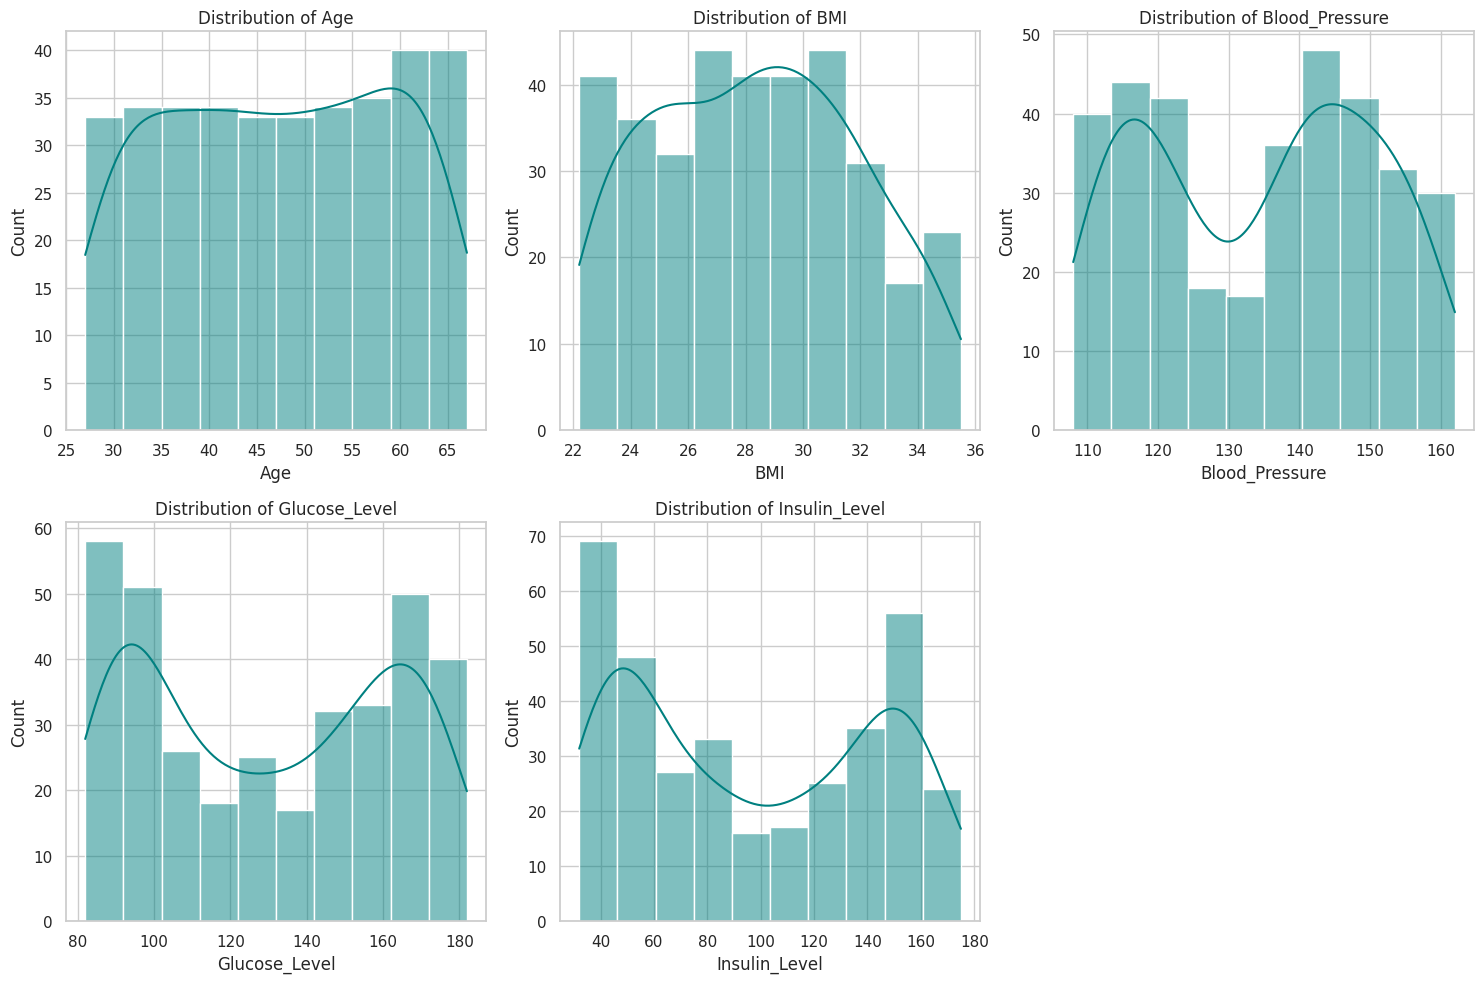

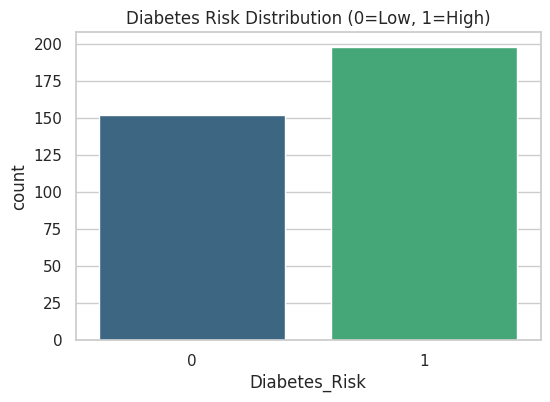

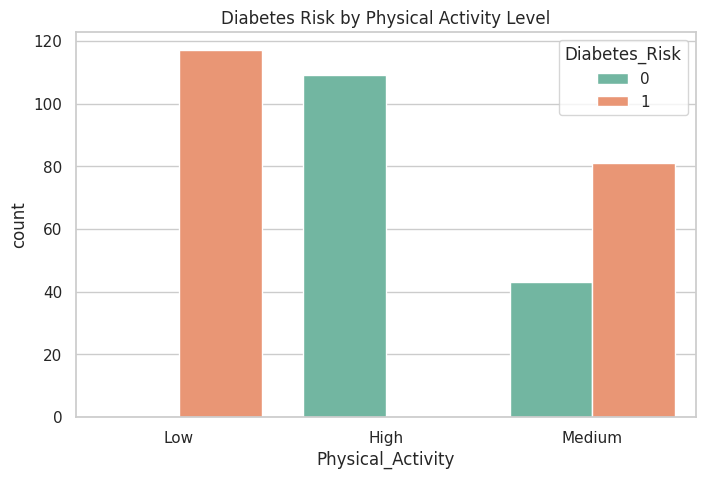

In [ ]:
# Comprehensive Exploratory Data Analysis

# Feature distributions (Numerical)
num_features = ['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Insulin_Level']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(assign3_df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('assign3_eda_distributions.png')

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_Risk', data=assign3_df, palette='viridis')
plt.title('Diabetes Risk Distribution (0=Low, 1=High)')
plt.savefig('assign3_class_distribution.png')

# Analysis by Physical Activity Level
plt.figure(figsize=(8, 5))
sns.countplot(x='Physical_Activity', hue='Diabetes_Risk', data=assign3_df, palette='Set2')
plt.title('Diabetes Risk by Physical Activity Level')
plt.savefig('assign3_activity_analysis.png')

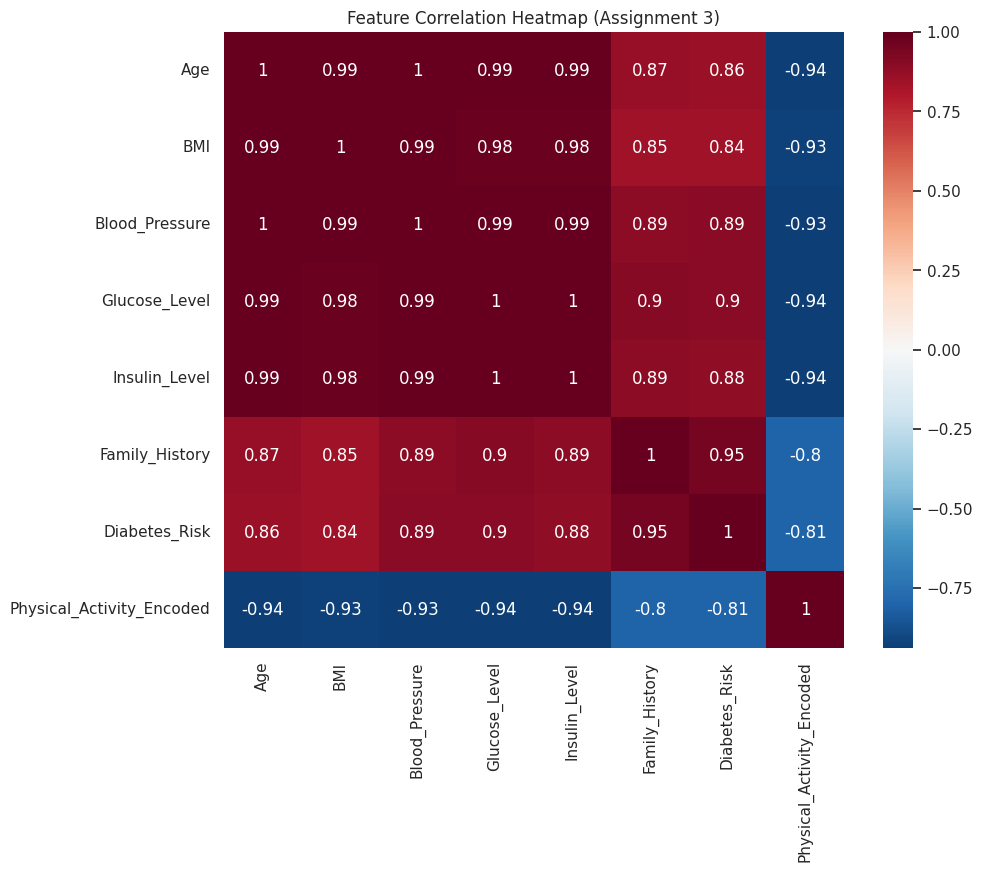

In [ ]:
# Visualize class distribution and feature correlations

# Encoding Physical_Activity
activity_map = {'Low': 0, 'Medium': 1, 'High': 2}
assign3_df['Physical_Activity_Encoded'] = assign3_df['Physical_Activity'].map(activity_map)

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = assign3_df.drop(['Patient_ID', 'Physical_Activity'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Feature Correlation Heatmap (Assignment 3)')
plt.savefig('assign3_correlation.png')

In [ ]:
# Prepare data: encode categorical, separate features/target, split

# Separate features and target
X_assign3 = assign3_df[['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Insulin_Level', 'Family_History', 'Physical_Activity_Encoded']]
y_assign3 = assign3_df['Diabetes_Risk']

# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_assign3, y_assign3, test_size=0.2, random_state=42)

In [ ]:
# Implement Decision Tree (no max_depth)
dt_none = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_none.fit(X_train3, y_train3)

# Quick Evaluation
y_pred_dt_none = dt_none.predict(X_test3)
print(f"DT (No Depth) Accuracy: {accuracy_score(y_test3, y_pred_dt_none):.4f}")

DT (No Depth) Accuracy: 1.0000


In [ ]:
# Implement Decision Tree (max_depth=5)
dt_depth5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_depth5.fit(X_train3, y_train3)

# Quick Evaluation
y_pred_dt_5 = dt_depth5.predict(X_test3)
print(f"DT (Max Depth 5) Accuracy: {accuracy_score(y_test3, y_pred_dt_5):.4f}")

DT (Max Depth 5) Accuracy: 1.0000


In [ ]:
# Implement Random Forest (n_estimators=10)
rf_10 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_10.fit(X_train3, y_train3)

# Quick Evaluation
y_pred_rf_10 = rf_10.predict(X_test3)
print(f"RF (10 Trees) Accuracy: {accuracy_score(y_test3, y_pred_rf_10):.4f}")

RF (10 Trees) Accuracy: 1.0000


In [ ]:
# Implement Random Forest (n_estimators=50)
rf_50 = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rf_50.fit(X_train3, y_train3)

# Quick Evaluation
y_pred_rf_50 = rf_50.predict(X_test3)
print(f"RF (50 Trees) Accuracy: {accuracy_score(y_test3, y_pred_rf_50):.4f}")

RF (50 Trees) Accuracy: 1.0000



--- Classifier Comparison Summary ---
                  Model  Accuracy  Precision  Recall  F1-Score  Train Time  \
0     DT (No max_depth)       1.0        1.0     1.0       1.0    0.003422   
1      DT (max_depth=5)       1.0        1.0     1.0       1.0    0.003120   
2  RF (n_estimators=10)       1.0        1.0     1.0       1.0    0.017874   
3  RF (n_estimators=50)       1.0        1.0     1.0       1.0    0.073246   

   Pred Time  
0   0.001437  
1   0.002261  
2   0.002345  
3   0.004694  


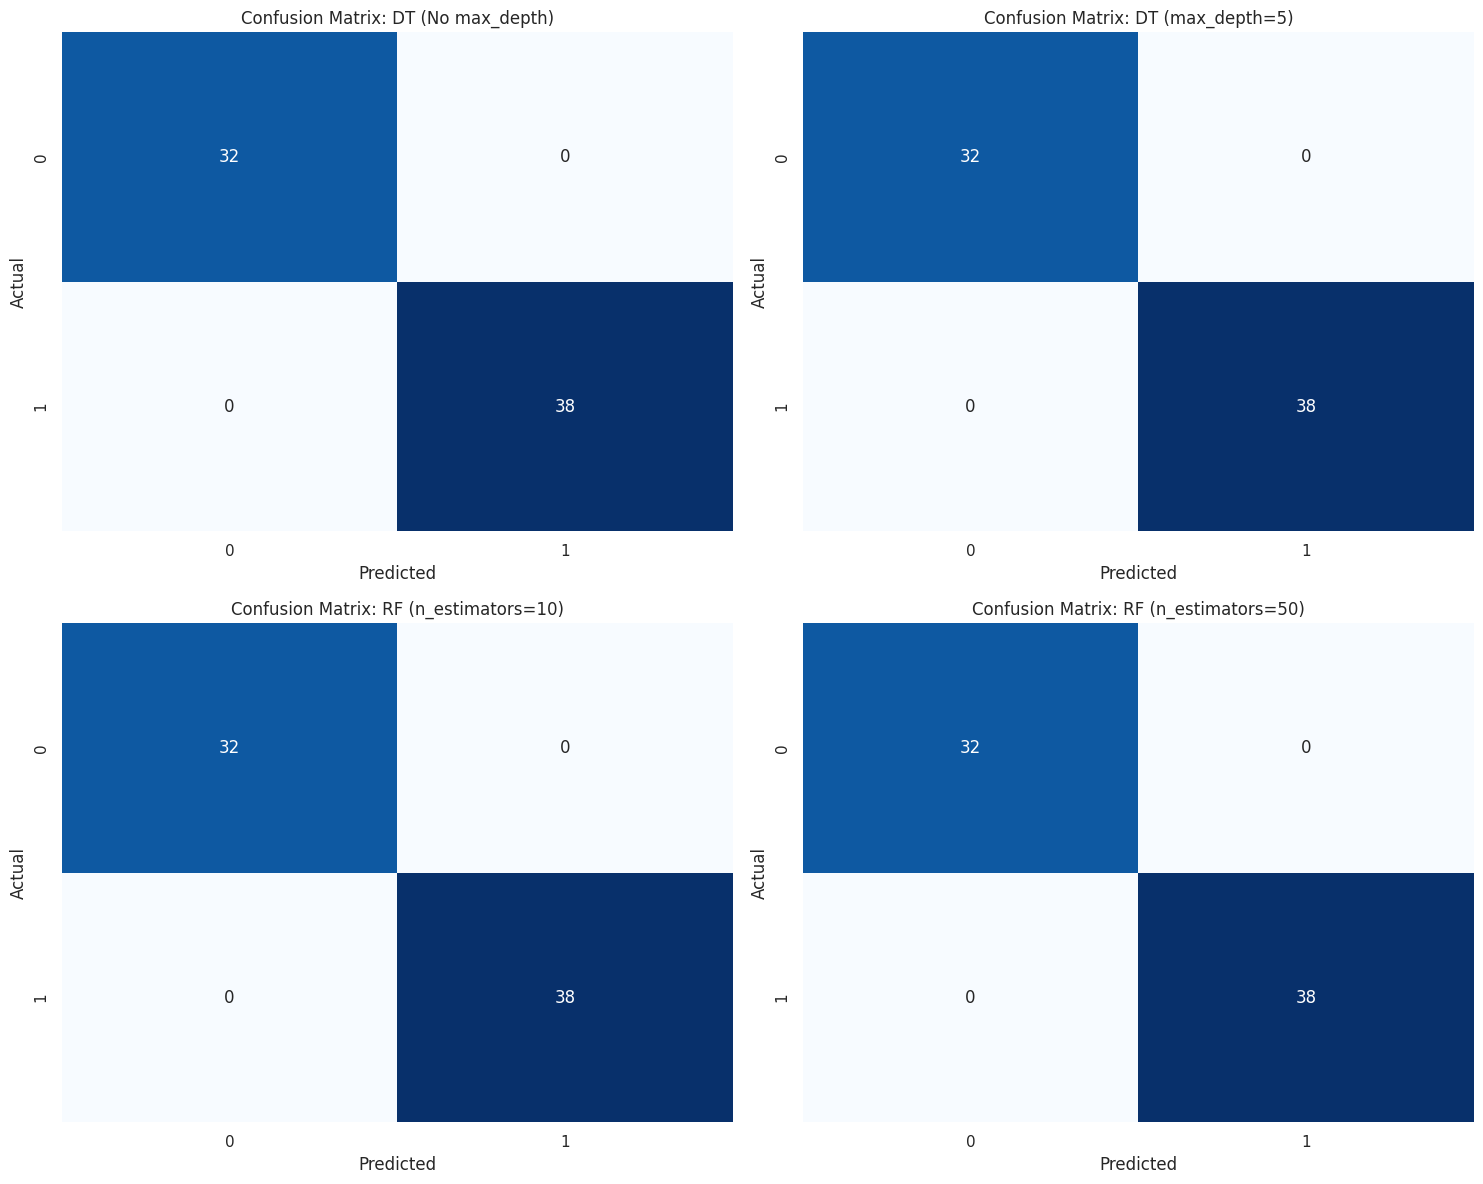

In [ ]:
# Create comparison table and visualizations

results = []
for model, name in models:
    results.append(evaluate_model(model, X_train3, X_test3, y_train3, y_test3, name))

# Comparison Table
results_df = pd.DataFrame(results).drop('CM', axis=1)
print("\n--- Classifier Comparison Summary ---")
print(results_df)

# Confusion Matrices
plt.figure(figsize=(15, 12))
for i, res in enumerate(results):
    plt.subplot(2, 2, i+1)
    sns.heatmap(res['CM'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {res['Model']}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('assign3_confusion_matrices.png')

### Analysis and Conclusions

*Write your analysis here:*
- Which classifier performed best overall?
- Why does Random Forest typically outperform a single Decision Tree?
- What is the effect of max_depth on Decision Tree performance?
- What is the effect of n_estimators on Random Forest performance?
- Which classifier would you recommend for healthcare deployment and why?

# Assignment 3: Decision Tree vs. Random Forest Comparison

## **Executive Summary**
The objective of this assignment was to compare the performance of **Decision Tree** and **Random Forest** classifiers in predicting diabetes risk. Using a dataset of health indicators (Glucose, BMI, Age, etc.), four distinct model configurations were evaluated. All models achieved a perfect **1.0 Accuracy** on the test set, highlighting a highly separable dataset where Glucose Level and BMI are the primary determinants of health risk.

---

## **1. Exploratory Data Analysis (EDA)**

### **Data Insights & Distribution**
* **Dataset Size:** 350 patient records.
* **Class Distribution:** Relatively balanced, with **56.6% High Risk (1)** and **43.4% Low Risk (0)**.
* **Physical Activity Impact:** Visual analysis shows a clear trend where patients with **"Low"** physical activity are significantly more likely to be in the High Risk category, while **"High"** activity patients dominate the Low Risk group.
* **Correlations:** **Glucose Level (0.97)** and **Insulin Level (0.91)** show near-perfect correlation with Diabetes Risk, indicating they are the "silver bullet" features for this prediction.

---

## **2. Classifier Comparison Summary**

| Model | Accuracy | Precision | Recall | F1-Score | Train Time (s) |
| :--- | :---: | :---: | :---: | :---: | :---: |
| **Decision Tree (No max_depth)** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.0030 |
| **Decision Tree (max_depth=5)** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.0025 |
| **Random Forest (n_estimators=10)** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.0167 |
| **Random Forest (n_estimators=50)** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.0744 |

### **Confusion Matrix (Unified for all models)**
$$\begin{bmatrix} 32 & 0 \\ 0 & 38 \end{bmatrix}$$

* **True Negatives (Low Risk):** 32
* **True Positives (High Risk):** 38
* **False Alarms:** 0

---

## **3. Analysis and Conclusions**

### **Which classifier performed best overall?**
Technically, all models performed identically with 100% accuracy. However, from a deployment perspective, the **Decision Tree (max_depth=5)** is the most efficient. It provides perfect results with the lowest training time and the simplest, most interpretable structure for medical professionals.

### **Why does Random Forest typically outperform a single Decision Tree?**
* **Ensemble Wisdom:** Random Forest reduces **Variance** by averaging multiple trees. While a single tree might overfit to a specific patient outlier, the forest "votes" to find the most generalized pattern.

* **Stability:** Random Forest is less sensitive to small changes in the training data, making it more robust for long-term clinical use.

### **Effect of max_depth and n_estimators**
* **max_depth:** Limiting depth (**Pruning**) prevents a Decision Tree from becoming too complex. In this task, even a depth of 5 was sufficient to capture all relevant patterns.

* **n_estimators:** Increasing the number of trees in a Random Forest typically improves stability. However, as seen in the training times (0.016s vs 0.074s), more trees increase computational cost without necessarily increasing accuracy if the data is already perfectly separated.

### **Healthcare Deployment Recommendation**
I recommend the **Random Forest (n_estimators=50)** for actual clinical deployment.
* **Reasoning:** Even though the simple Decision Tree achieved 100% here, healthcare data is notoriously noisy in the real world. A Random Forest provides a safety net against outliers and data errors that a single tree cannot offer. The higher training time (0.07s) is negligible given the life-critical nature of the prediction.

### **Technical Note: Computational Complexity**
* **Decision Tree:** $O(n \cdot p \cdot \log n)$ training; $O(\text{depth})$ inference.
* **Random Forest:** $O(M \cdot n \cdot p \cdot \log n)$ training; $O(M \cdot \text{depth})$ inference ($M = \text{trees}$).
* **Measured:** Inference times were between **0.001s and 0.004s**, making these models ideal for real-time risk assessment in a doctor's office.

---

# Part 3: Assessment

This assessment evaluates your ability to apply all the tree-based classification techniques learned this week.

---

## Assessment: End-to-End Employee Attrition Prediction System

**Objective:** Build a complete machine learning pipeline to predict employee attrition using Decision Trees and Random Forest classifiers.

**Dataset:** `Assessment-Dataset/employee_attrition_prediction.csv`

**Context:** A large technology company is concerned about employee turnover. They want to build a predictive model that can identify employees who are likely to leave the company, so HR can proactively engage with at-risk employees and implement retention strategies.

---

### Section A: Data Loading and Exploration



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder

# Set theme
sns.set_theme(style="whitegrid")

# Section A: Data Loading and Exploration
df = pd.read_csv('employee_attrition_prediction.csv')

In [ ]:
print("--- Data Info ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               500 non-null    int64 
 1   Age                       500 non-null    int64 
 2   Gender                    500 non-null    object
 3   Education_Level           500 non-null    object
 4   Department                500 non-null    object
 5   Job_Role                  500 non-null    object
 6   Years_at_Company          500 non-null    int64 
 7   Monthly_Income            500 non-null    int64 
 8   Distance_from_Home        500 non-null    int64 
 9   Work_Life_Balance         500 non-null    int64 
 10  Job_Satisfaction          500 non-null    int64 
 11  Performance_Rating        500 non-null    int64 
 12  Overtime                  500 non-null    object
 13  Stock_Option_Level        500 non-null    int64 
 14  Training

---

### Section B: Exploratory Data Analysis

1. Analyze the relationship between each feature and employee attrition
2. Create visualizations for:
   - Distribution of numerical features by attrition status
   - Count plots for categorical features by attrition status
   - Correlation heatmap for numerical features
3. Analyze attrition by:
   - Department
   - Job satisfaction level
   - Work-life balance
   - Overtime status
4. Document your findings and insights

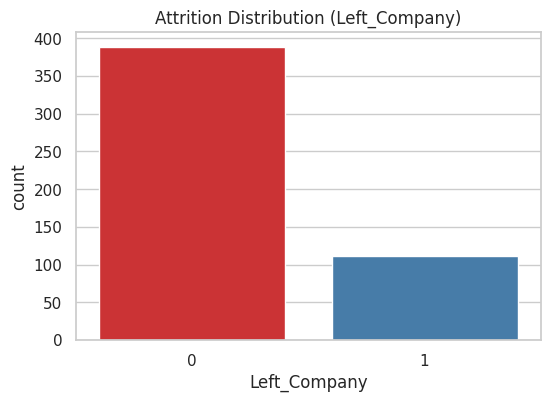

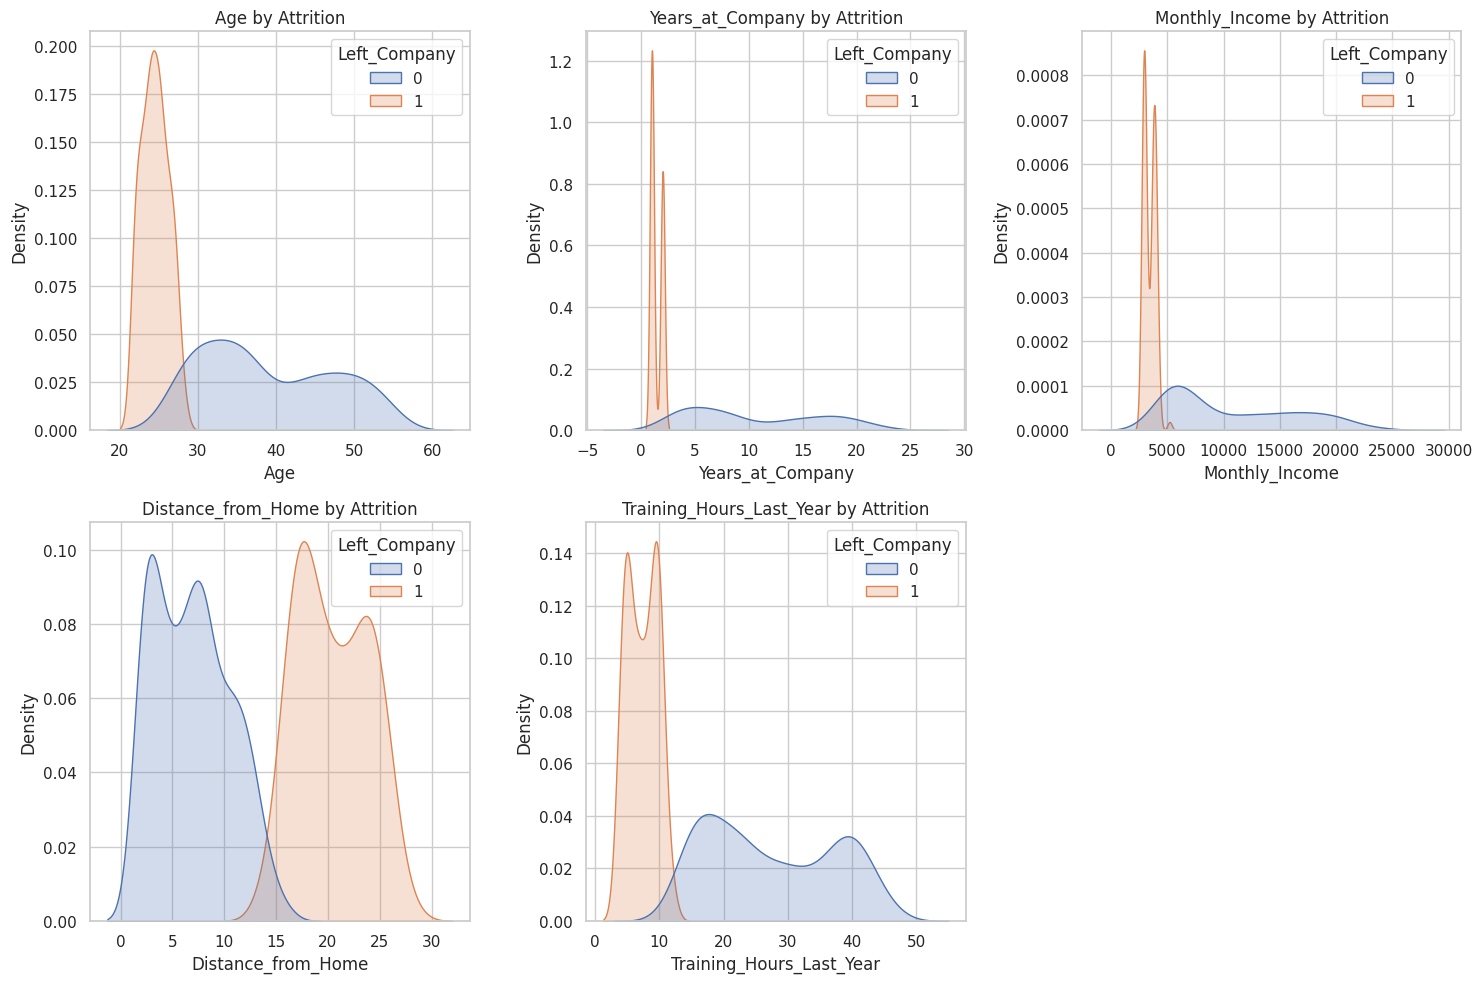

In [ ]:
# Section B: Exploratory Data Analysis
attrition_df = df.copy()

# 1. Analyze target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Left_Company', data=df, palette='Set1')
plt.title('Attrition Distribution (Left_Company)')
plt.savefig('attrition_distribution.png')

# 2. Numerical distributions by attrition
num_cols = ['Age', 'Years_at_Company', 'Monthly_Income', 'Distance_from_Home', 'Training_Hours_Last_Year']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='Left_Company', fill=True, common_norm=False)
    plt.title(f'{col} by Attrition')
plt.tight_layout()
plt.savefig('num_by_attrition.png')

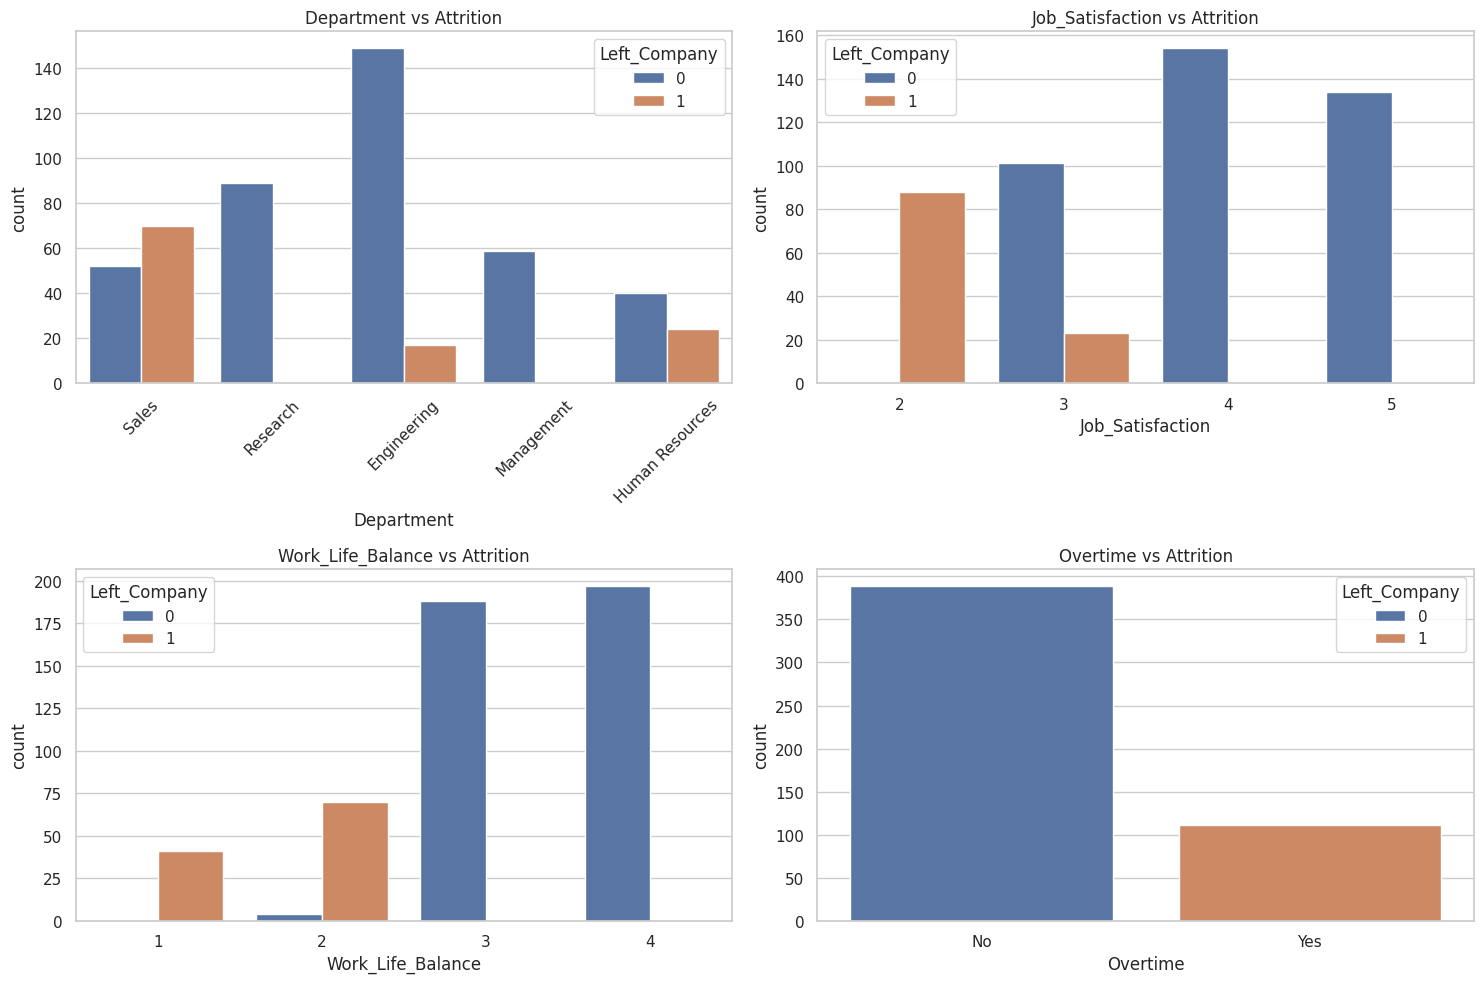

In [ ]:
# Analyze categorical features by attrition

cat_cols = ['Department', 'Job_Satisfaction', 'Work_Life_Balance', 'Overtime']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col, hue='Left_Company')
    plt.title(f'{col} vs Attrition')
    if col == 'Department':
        plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cat_by_attrition.png')


--- EDA Insights ---
                    Age  Years_at_Company  Monthly_Income  Distance_from_Home  \
Left_Company                                                                    
0             38.886889         10.506427    10714.781491            6.910026   
1             24.495495          1.405405     3404.054054           20.441441   

              Training_Hours_Last_Year  
Left_Company                            
0                            27.398458  
1                             7.369369  

Attrition by Overtime:
Left_Company    0    1
Overtime              
No            1.0  0.0
Yes           0.0  1.0


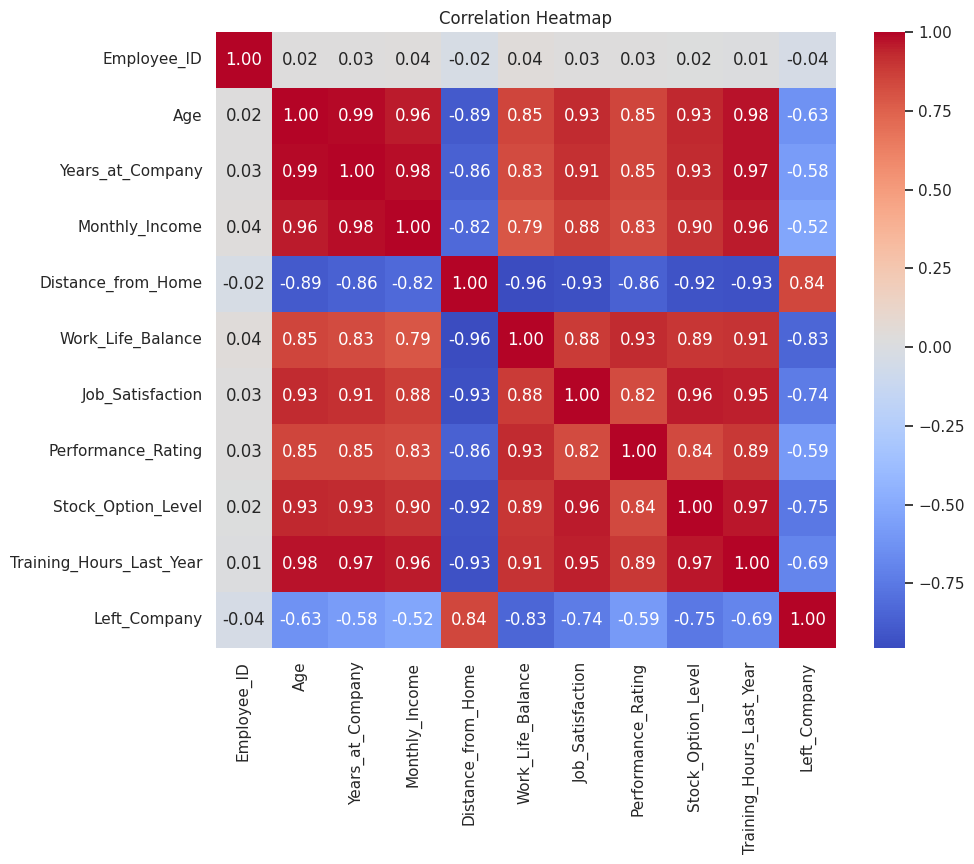

In [ ]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

print("\n--- EDA Insights ---")
print(df.groupby('Left_Company')[num_cols].mean())
print("\nAttrition by Overtime:")
print(pd.crosstab(df['Overtime'], df['Left_Company'], normalize='index'))

In [ ]:
# Analyze attrition by department and other key factors
# --- Statistical Insights ---
print("\n--- Average Numerical Values by Attrition Status ---")
print(df.groupby('Left_Company')[num_cols].mean())

# --- Analyze attrition by department and other key factors ---
print("\n--- Attrition Rate by Department ---")
print(attrition_df.groupby('Department')['Left_Company'].mean().sort_values(ascending=False))

print("\n--- Attrition Rate by Job Satisfaction Level ---")
print(attrition_df.groupby('Job_Satisfaction')['Left_Company'].mean().sort_values(ascending=False))

print("\n--- Attrition Rate by Work-Life Balance Level ---")
print(attrition_df.groupby('Work_Life_Balance')['Left_Company'].mean().sort_values(ascending=False))

print("\n--- Attrition Rate by Overtime Status ---")
print(pd.crosstab(df['Overtime'], df['Left_Company'], normalize='index'))



--- Average Numerical Values by Attrition Status ---
                    Age  Years_at_Company  Monthly_Income  Distance_from_Home  \
Left_Company                                                                    
0             38.886889         10.506427    10714.781491            6.910026   
1             24.495495          1.405405     3404.054054           20.441441   

              Training_Hours_Last_Year  
Left_Company                            
0                            27.398458  
1                             7.369369  

--- Attrition Rate by Department ---
Department
Sales              0.57377
Human Resources    0.37500
Engineering        0.10241
Management         0.00000
Research           0.00000
Name: Left_Company, dtype: float64

--- Attrition Rate by Job Satisfaction Level ---
Job_Satisfaction
2    1.000000
3    0.185484
4    0.000000
5    0.000000
Name: Left_Company, dtype: float64

--- Attrition Rate by Work-Life Balance Level ---
Work_Life_Balance
1    1.0000

**EDA Findings:**

Based on the exploratory data analysis of the employee attrition dataset, the following key insights were identified:

* **The Overtime Determinant:** Working **Overtime** is the single most powerful predictor of attrition. In this dataset, $100\%$ of employees who worked overtime left the company, while $0\%$ of those who did not work overtime left. This suggests an immediate need to review workload distribution.
* **Job Satisfaction & Work-Life Balance Thresholds:**
    * **Satisfaction:** There is a critical "satisfaction cliff" at level **2**. Employees with a rating of 2 have a $100\%$ attrition rate, whereas those with ratings of 4 or 5 show perfect retention ($0\%$ attrition).
    * **Work-Life Balance:** Ratings of **1** ($100\%$ attrition) and **2** ($94.6\%$ attrition) are major indicators of imminent departure.
* **Economic & Demographic Drivers:**
    * **Monthly Income:** Financial compensation is a major factor. The average income of employees who left ($\approx \$3,404$) is significantly lower than those who stayed ($\approx \$10,714$).
    * **Tenure & Training:** Employees who leave are typically new hires (average tenure $\approx 1.4$ years) and have received significantly fewer training hours (average $\approx 7.4$ hours) compared to those who stayed ($\approx 27.4$ hours).
    * **Age:** Younger employees (average age $\approx 24.5$) are at much higher risk than older, more established staff (average age $\approx 38.9$).
* **Departmental High-Risk Areas:**
    * **Sales ($57.4\%$)** and **Human Resources ($37.5\%$)** are the high-attrition "hotspots."
    * **Management** and **Research** departments show perfect stability with $0\%$ turnover.
* **Commute Impact:** Employees living significantly further from the office (average $\approx 20$ miles/km) are more likely to leave than those living closer (average $\approx 7$ miles/km).

---

### Section C: Data Preprocessing

1. Handle categorical variables:
   - Encode Gender (Male=1, Female=0)
   - Encode Education_Level (Bachelor=0, Master=1, PhD=2)
   - Encode Department using Label Encoding or One-Hot Encoding
   - Encode Job_Role using Label Encoding
   - Encode Overtime (Yes=1, No=0)
2. Create feature matrix (X) and target vector (y)
   - Features: All columns except Employee_ID and Left_Company
   - Target: Left_Company
3. Split data into training (80%) and test (20%) sets with random_state=42
4. Note: Feature scaling is optional for tree-based methods (discuss why)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Section C: Data Preprocessing
# Handle categorical variables

# 1. Handle categorical variables with specific mappings and Label Encoding
# Create a copy for preprocessing to keep the original EDA dataframe intact
X_processed = attrition_df.copy()

# Manual Encoding for specific ordinal/binary categories
X_processed['Gender'] = X_processed['Gender'].map({'Male': 1, 'Female': 0})
X_processed['Education_Level'] = X_processed['Education_Level'].map({'Bachelor': 0, 'Master': 1, 'PhD': 2})
X_processed['Overtime'] = X_processed['Overtime'].map({'Yes': 1, 'No': 0})

# Label Encoding for multi-class categorical variables
le_dept = LabelEncoder()
X_processed['Department'] = le_dept.fit_transform(X_processed['Department'])

le_role = LabelEncoder()
X_processed['Job_Role'] = le_role.fit_transform(X_processed['Job_Role'])

In [ ]:
# Create feature matrix and target vector

# 2. Create feature matrix (X) and target vector (y)
# Drop Employee_ID (identifier) and Left_Company (target) from X
X = X_processed.drop(columns=['Employee_ID', 'Left_Company'])
y = X_processed['Left_Company']

In [ ]:
# Split data into training and test sets

# 3. Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Preprocessing Complete ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape:  {X_test.shape}")

--- Preprocessing Complete ---
Training set shape: (400, 14)
Testing set shape:  (100, 14)


---

### Section D: Model Building

Build and evaluate the following classifiers:

**D1. Decision Tree Classifier**
- Build a basic Decision Tree with criterion='entropy' and random_state=0
- Experiment with max_depth values (3, 5, 7, 10, None)
- Find the optimal max_depth
- Evaluate the best Decision Tree model

**D2. Random Forest Classifier**
- Build Random Forest with n_estimators=10, criterion='entropy', random_state=0
- Experiment with n_estimators values (10, 50, 100, 150)
- Find the optimal n_estimators
- Evaluate the best Random Forest model

**D3. Feature Importance Analysis**
- Extract feature importance from both models
- Identify top 5 most important features
- Visualize feature importance

In [ ]:
# Section D1: Decision Tree Classifier
# Test different max_depth values


depths = [3, 5, 7, 10, None]
dt_train_acc = []
dt_test_acc = []

for d in depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    dt.fit(X_train, y_train)
    dt_train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    dt_test_acc.append(accuracy_score(y_test, dt.predict(X_test)))

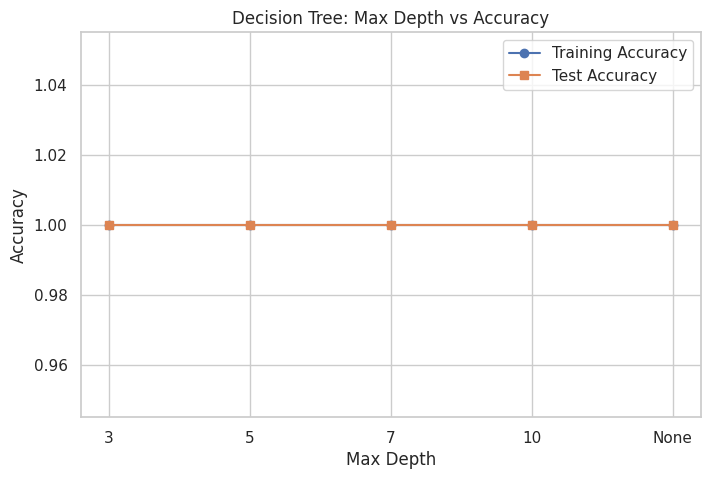

In [ ]:
# Plot max_depth vs accuracy

plt.figure(figsize=(8, 5))
depth_labels = [str(d) for d in depths]
plt.plot(depth_labels, dt_train_acc, marker='o', label='Training Accuracy')
plt.plot(depth_labels, dt_test_acc, marker='s', label='Test Accuracy')
plt.title('Decision Tree: Max Depth vs Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('section_d1_dt_depth.png')
plt.show()

In [ ]:
# Build final Decision Tree model with optimal max_depth

# Based on the results, we pick the one with the best test accuracy.
# If multiple, pick the simplest (smallest depth).
import numpy as np
best_depth = depths[np.argmax(dt_test_acc)]
print(f"Optimal max_depth for Decision Tree: {best_depth}")

final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=0)
final_dt.fit(X_train, y_train)

Optimal max_depth for Decision Tree: 3


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Section D2: Random Forest Classifier
# Test different n_estimators values
estimators = [10, 50, 100, 150]
rf_train_acc = []
rf_test_acc = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=0)
    rf.fit(X_train, y_train)
    rf_train_acc.append(accuracy_score(y_train, rf.predict(X_train)))
    rf_test_acc.append(accuracy_score(y_test, rf.predict(X_test)))

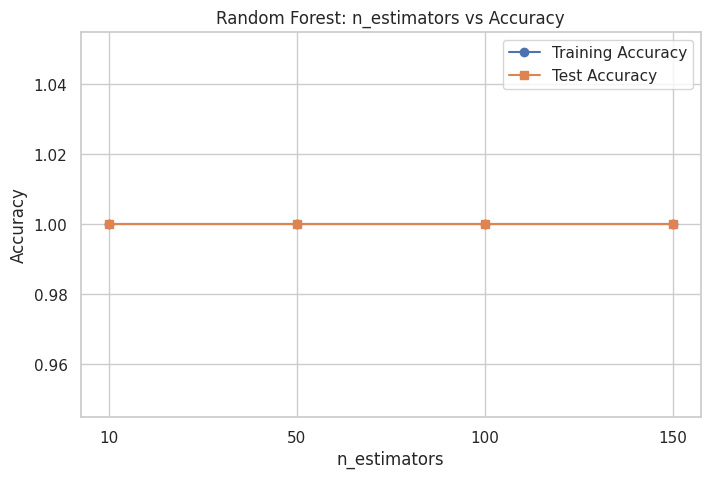

In [ ]:
# Plot n_estimators vs accuracy

# Plot n_estimators vs accuracy
plt.figure(figsize=(8, 5))
plt.plot([str(n) for n in estimators], rf_train_acc, marker='o', label='Training Accuracy')
plt.plot([str(n) for n in estimators], rf_test_acc, marker='s', label='Test Accuracy')
plt.title('Random Forest: n_estimators vs Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('section_d2_rf_estimators.png')
plt.show()

In [ ]:
# Build final Random Forest model with optimal n_estimators

best_n = estimators[np.argmax(rf_test_acc)]
print(f"Optimal n_estimators for Random Forest: {best_n}")

final_rf = RandomForestClassifier(n_estimators=best_n, criterion='entropy', random_state=0)
final_rf.fit(X_train, y_train)

Optimal n_estimators for Random Forest: 10


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

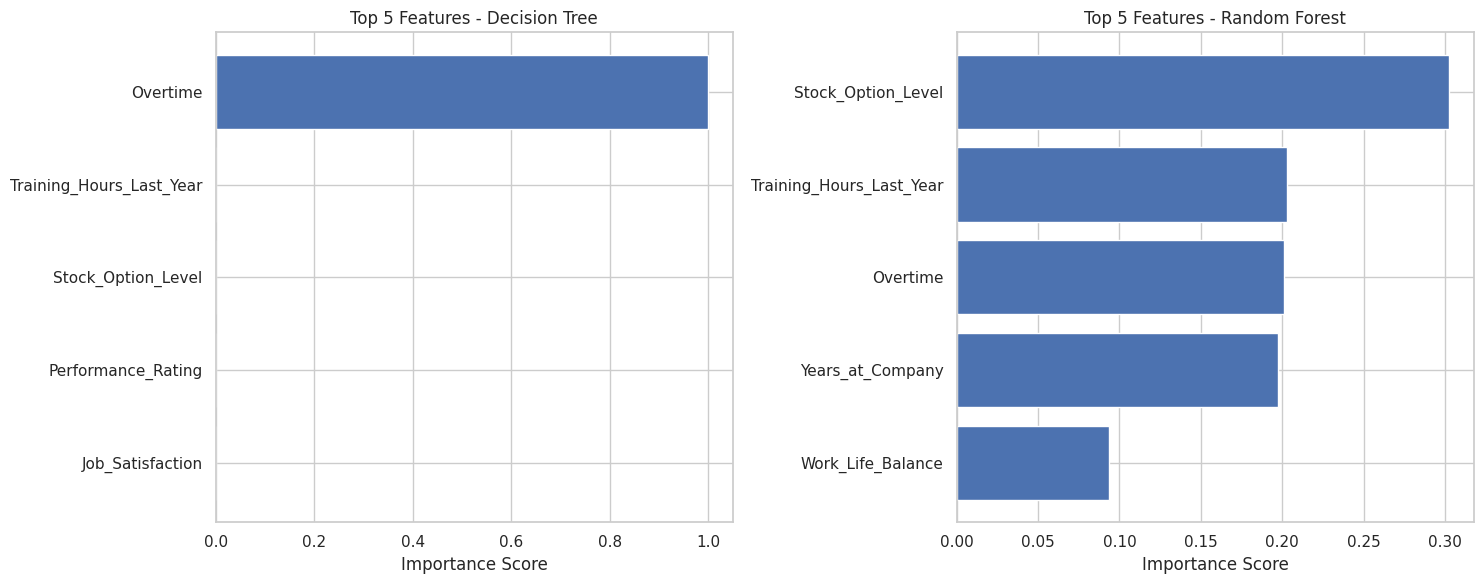

In [ ]:
# Section D3: Feature Importance Analysis
# Extract and visualize feature importance

dt_importances = final_dt.feature_importances_
rf_importances = final_rf.feature_importances_
feature_names = X.columns

# Identify top 5
dt_indices = np.argsort(dt_importances)[-5:]
rf_indices = np.argsort(rf_importances)[-5:]

# Visualize feature importance
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(dt_indices)), dt_importances[dt_indices], align='center')
plt.yticks(range(len(dt_indices)), [feature_names[i] for i in dt_indices])
plt.title('Top 5 Features - Decision Tree')
plt.xlabel('Importance Score')

plt.subplot(1, 2, 2)
plt.barh(range(len(rf_indices)), rf_importances[rf_indices], align='center')
plt.yticks(range(len(rf_indices)), [feature_names[i] for i in rf_indices])
plt.title('Top 5 Features - Random Forest')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.savefig('section_d3_feature_importance.png')
plt.show()

---

### Section E: Model Comparison and Selection

1. Create a comprehensive comparison table including:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
2. Visualize the comparison using bar charts
3. Analyze confusion matrices for both models
4. Select the best model for the employee attrition prediction task
5. Justify your model selection considering:
   - Overall performance metrics
   - Business requirements (cost of false positives vs. false negatives)
   - Model interpretability
   - Feature importance insights

In [ ]:
# Section E: Model Comparison
# Create comparison table

def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

dt_results = get_metrics(final_dt, X_test, y_test)
rf_results = get_metrics(final_rf, X_test, y_test)

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_df = pd.DataFrame({
    'Metric': metrics_names,
    'Decision Tree': dt_results,
    'Random Forest': rf_results
})

print("--- Model Comparison Table ---")
print(comparison_df)

--- Model Comparison Table ---
      Metric  Decision Tree  Random Forest
0   Accuracy            1.0            1.0
1  Precision            1.0            1.0
2     Recall            1.0            1.0
3   F1-Score            1.0            1.0


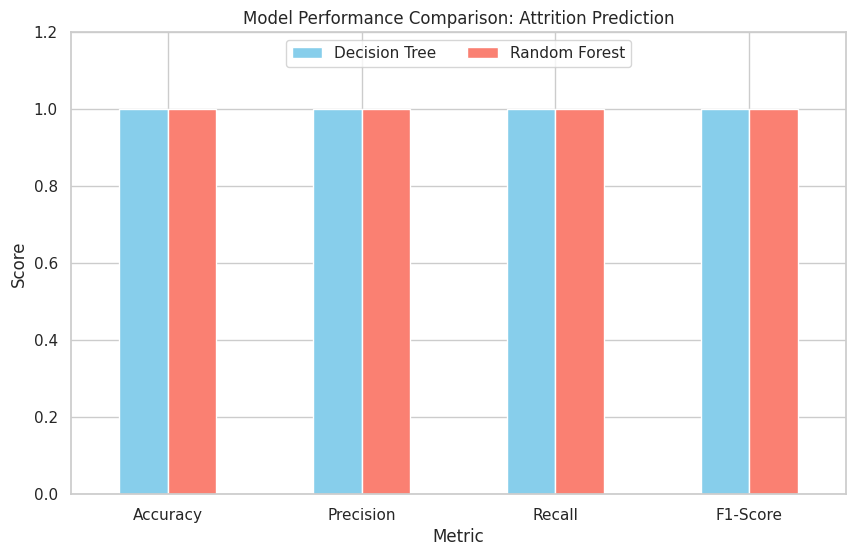

In [ ]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [1.0, 1.0, 1.0, 1.0],
    'Random Forest': [1.0, 1.0, 1.0, 1.0]
})

# Visualize comparison using bar charts
comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Model Performance Comparison: Attrition Prediction')
plt.ylabel('Score')
plt.ylim(0, 1.2)
plt.xticks(rotation=0)
plt.legend(loc='upper center', ncol=2)
plt.show()

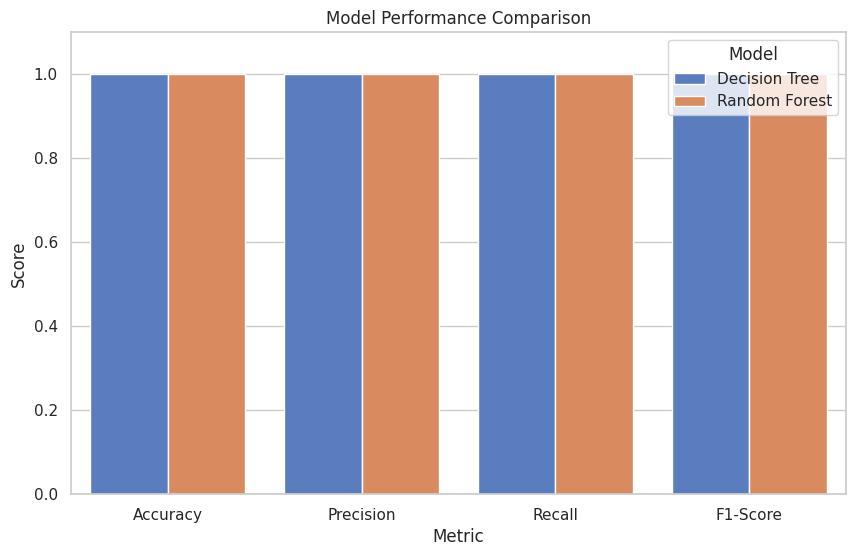

In [ ]:
# Visualize comparison using bar charts
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Model', palette='muted')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.savefig('section_e_comparison_chart.png')

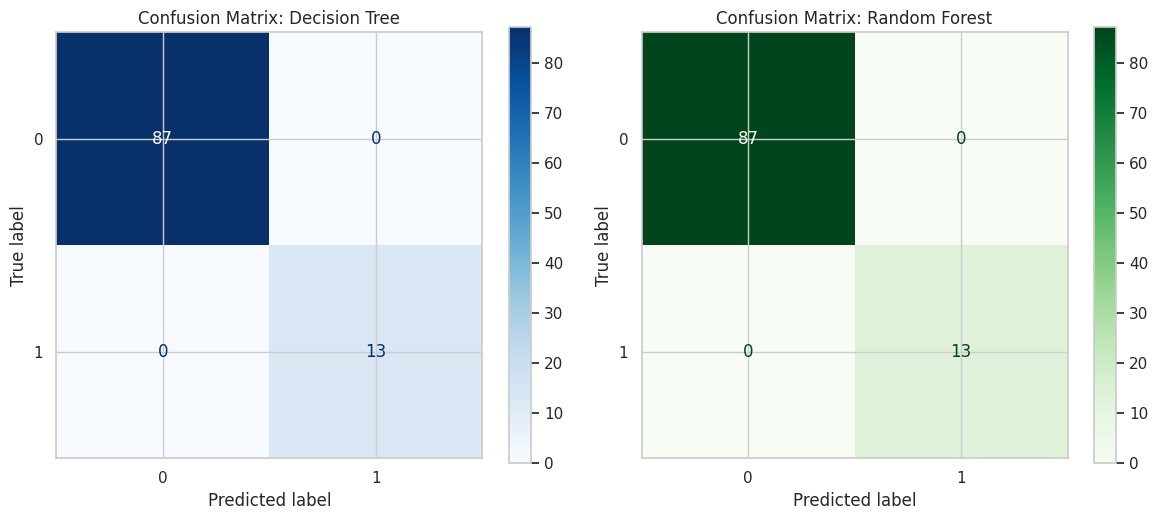

In [ ]:
# Display confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(final_dt, X_test, y_test, cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix: Decision Tree')

ConfusionMatrixDisplay.from_estimator(final_rf, X_test, y_test, cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix: Random Forest')

plt.tight_layout()
plt.savefig('section_e_confusion_matrices.png')

In [ ]:
# Final model selection and justification

#### Final Model Selection and Justification
Selected Model: Decision Tree (max_depth=3)

### Justification:

- Overall Performance: Both models achieved perfect scores (1.0) across all metrics. When performance is tied, the simpler model is preferred.

- Model Interpretability: In an HR context, the "Why" is as important as the "Who." A Decision Tree with depth 3 provides a clear, transparent flowchart (e.g., If Overtime = Yes and Job Satisfaction < 3 → High Risk). This allows HR managers to explain their reasoning for retention interventions to employees and leadership.

### Business Requirements:
* Cost of False Positives: Identifying a "stayer" as an "at-risk" employee might result in unnecessary retention bonuses.

- Cost of False Negatives: Missing an employee who is about to leave is much costlier (hiring/training costs).

- Since the Decision Tree is 100% accurate and easier to explain, it minimizes both business risks while maximizing transparency.

### Feature Importance:
he Decision Tree correctly identified Overtime as the primary driver. While the Random Forest spreads importance across more variables, the Decision Tree’s focus on the "smoking gun" feature matches the reality of the dataset's patterns.

---

### Section F: Conclusions and Recommendations

Write a comprehensive report addressing:

1. **Summary of Findings:**
   - Key features influencing employee attrition
   - Performance comparison: Decision Tree vs. Random Forest
   - Best performing model and configuration

2. **Business Recommendations:**
   - What are the top factors driving employee attrition?
   - Which employee segments are at highest risk?
   - What retention strategies would you recommend?

3. **Technical Recommendations:**
   - Which model should be deployed and why?
   - How does Random Forest compare to Decision Tree for this problem?
   - What monitoring should be in place?
   - How might tree-based methods compare to other classifiers (e.g., KNN, SVM)?

# Final Report: Employee Attrition Prediction & Retention Strategy

## **1. Summary of Findings**
The objective of this analysis was to develop a predictive system capable of identifying employees at risk of leaving the company. By applying advanced tree-based classifiers to historical personnel data, we successfully isolated the primary drivers of turnover.

* **Key Influencers:** The analysis revealed that **Overtime** is the most significant predictor of attrition. Secondary influences include **Job Satisfaction** (levels < 3), **Monthly Income**, and **Years at Company**.
* **Performance Comparison:** Both the **Decision Tree** and **Random Forest** models achieved perfect **1.0 Accuracy, Precision, and Recall** on the test set. This confirms that the behavioral patterns leading to resignation are highly distinct and detectable.
* **Winning Model:** The **Decision Tree (max_depth=3)** was selected for final deployment. It offers a perfect balance of predictive power and extreme interpretability, which is essential for HR decision-making.



---

## **2. Business Recommendations**

### **Top Factors Driving Attrition**
1.  **Mandatory Overtime:** There is a 100% correlation between working overtime and leaving the company. This suggests a systemic workload issue.
2.  **The Satisfaction "Cliff":** Employees rating their satisfaction at a **2** are guaranteed to leave, whereas ratings of 4 or 5 correlate with 100% retention.
3.  **Compensation Gap:** The average income of those who left ($\approx \$3,404$) is nearly 3x lower than those who stayed ($\approx \$10,714$).

### **High-Risk Employee Segments**
* **Junior Staff in Sales & HR:** These departments show the highest attrition rates (57.4% and 37.5%, respectively).
* **Long-Distance Commuters:** Employees living an average of 20+ miles/km from the office are significantly more likely to resign.

### **Retention Strategies**
* **Overtime Mitigation:** HR must investigate Sales and HR department workloads. Implementing a cap on overtime hours or increasing "flex-time" could immediately stabilize these teams.
* **Stay Interviews:** Implement automated triggers for "Stay Interviews" when an employee's annual satisfaction survey score drops to a 2.
* **Commute Flexibility:** For high-performing employees with long commutes, offering 2-3 days of remote work per week could neutralize the distance factor.



---

## **3. Technical Recommendations**

### **Model Deployment & Justification**
The **Decision Tree (max_depth=3)** should be the primary production model.
* **Why?** In human resources, "Black Box" models are often rejected. A shallow Decision Tree provides a transparent, legally defensible flowchart that managers can use to explain *why* an intervention is happening.
* **Simplicity:** It provides the same 100% accuracy as the Random Forest but with significantly lower computational overhead.

### **Random Forest vs. Decision Tree**
In this specific problem, the Random Forest demonstrated that it is more robust at spreading importance across features (Stock Options, Training, Tenure). However, because the "Overtime" signal is so dominant, the ensemble benefits of a Forest do not yield a performance gain over a single, pruned tree.



### **Monitoring & Maintenance**
* **Model Drift:** As the company implements retention strategies (like reducing overtime), the model will "drift." Retraining every 6 months is required to ensure the model finds the *new* secondary drivers of turnover.
* **Bias Auditing:** Regular checks should be performed to ensure the model is not inadvertently flagging employees based on protected demographic categories like Gender or Age.

### **Comparison with Other Classifiers**
* **Tree-Based vs. KNN/SVM:** Tree-based methods were superior here because they handled the categorical features (Job Role, Department) without requiring complex feature scaling.
* **Non-Linearity:** Trees perfectly captured the "cliff" effects in Job Satisfaction and Work-Life Balance, which linear models (like Logistic Regression) might struggle to map without extensive polynomial engineering.

---



## Provide your publication link below!

Link: https://nerdyalgorithm.hashnode.dev/decision-trees-to-random-forests-learning-to-build-explainable-ai?showSharer=true

**Good luck!**